# Project Country Data

## Importing neccesry libraries

In [115]:
import sys
import joblib
sys.modules['sklearn.externals.joblib']=joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import FastICA as ICA
from scipy.cluster.hierarchy import dendrogram, linkage as hc_linkage
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.metrics import silhouette_score as sscore, calinski_harabasz_score as chscore, davies_bouldin_score as dbscore
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
warnings.filterwarnings('ignore')

## Loading the dataset

In [116]:
country_df = pd.read_csv("https://raw.githubusercontent.com/SameerSharma-57/Country_data_project/main/Country-data.csv?token=GHSAT0AAAAAACAV5LB6UMBHOHJKBVKZKPEMZBFNONQ")
country_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

## Preprocessing

In [117]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [118]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [119]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

So there are no NULL values in the dataset

## Scaling the data 

In [120]:
#Seperating Dataset from the country names
X = country_df.copy()
Y = X["country"]
X = X.drop("country" ,axis = 1)

#Scaling the Dataset X using Standard Scalar
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

## Vizualizing the data

<AxesSubplot: ylabel='Density'>

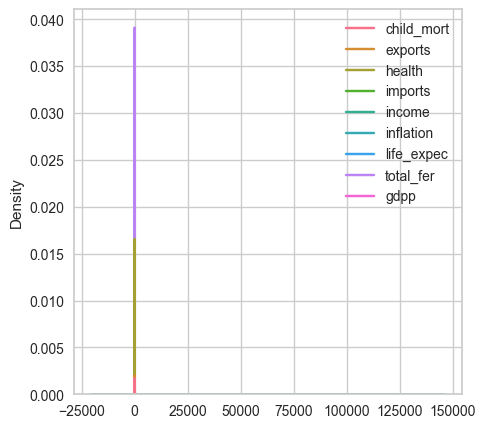

In [121]:
#kde Plot of unscaled Data
sns.kdeplot(data=X)

<AxesSubplot: ylabel='Density'>

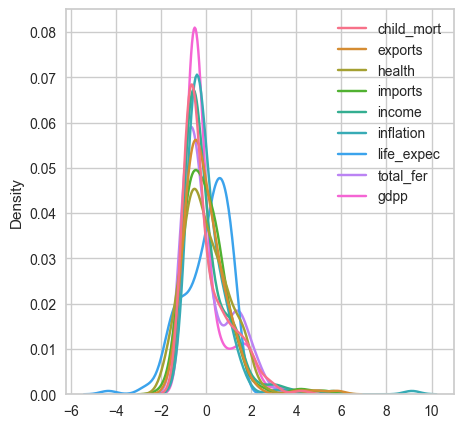

In [122]:
#kde Plot of Scaled Data
sns.kdeplot(data=X_scale)

As we can see that for unscaled data, some features are dominating on the density plot while otheres are not getting proper representation. In case of Scaled Data, we can see scaled plots where each feature is given equal representation.

[Text(0.5, 47.5815972222222, ''), Text(58.081597222222214, 0.5, '')]

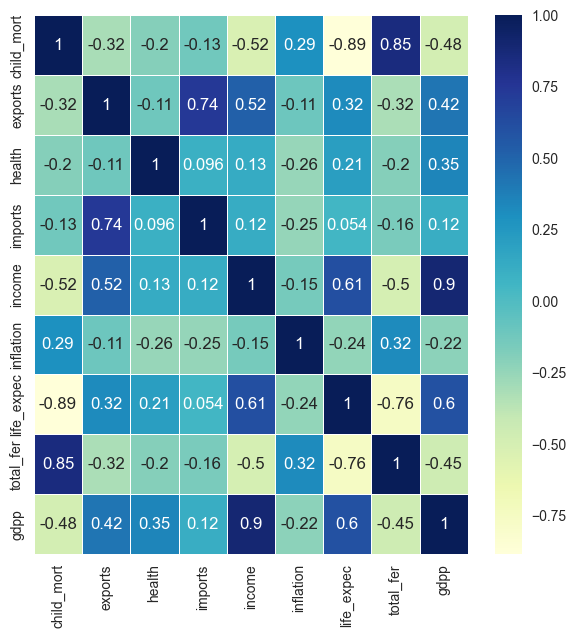

In [123]:
#Correlation heatmap for the data
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.heatmap(data = X.corr(),annot = True,cmap ='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")

From heatmap, we can infer that life expectency is strictly inversly proportional to total fertility and child mortality while directly proportional to income. Thus child mortality and total fertility are directly proportional to each other. Exports are directly proportional to income and imports. income is directly proportional to life expectancy, exports while inversly proportional to child mortality. As we can see that income and gdpp are highly positivly correlated, we can infer that countries with higher income, exports and imports usually have higher gdpp which tends to better life expectancy.

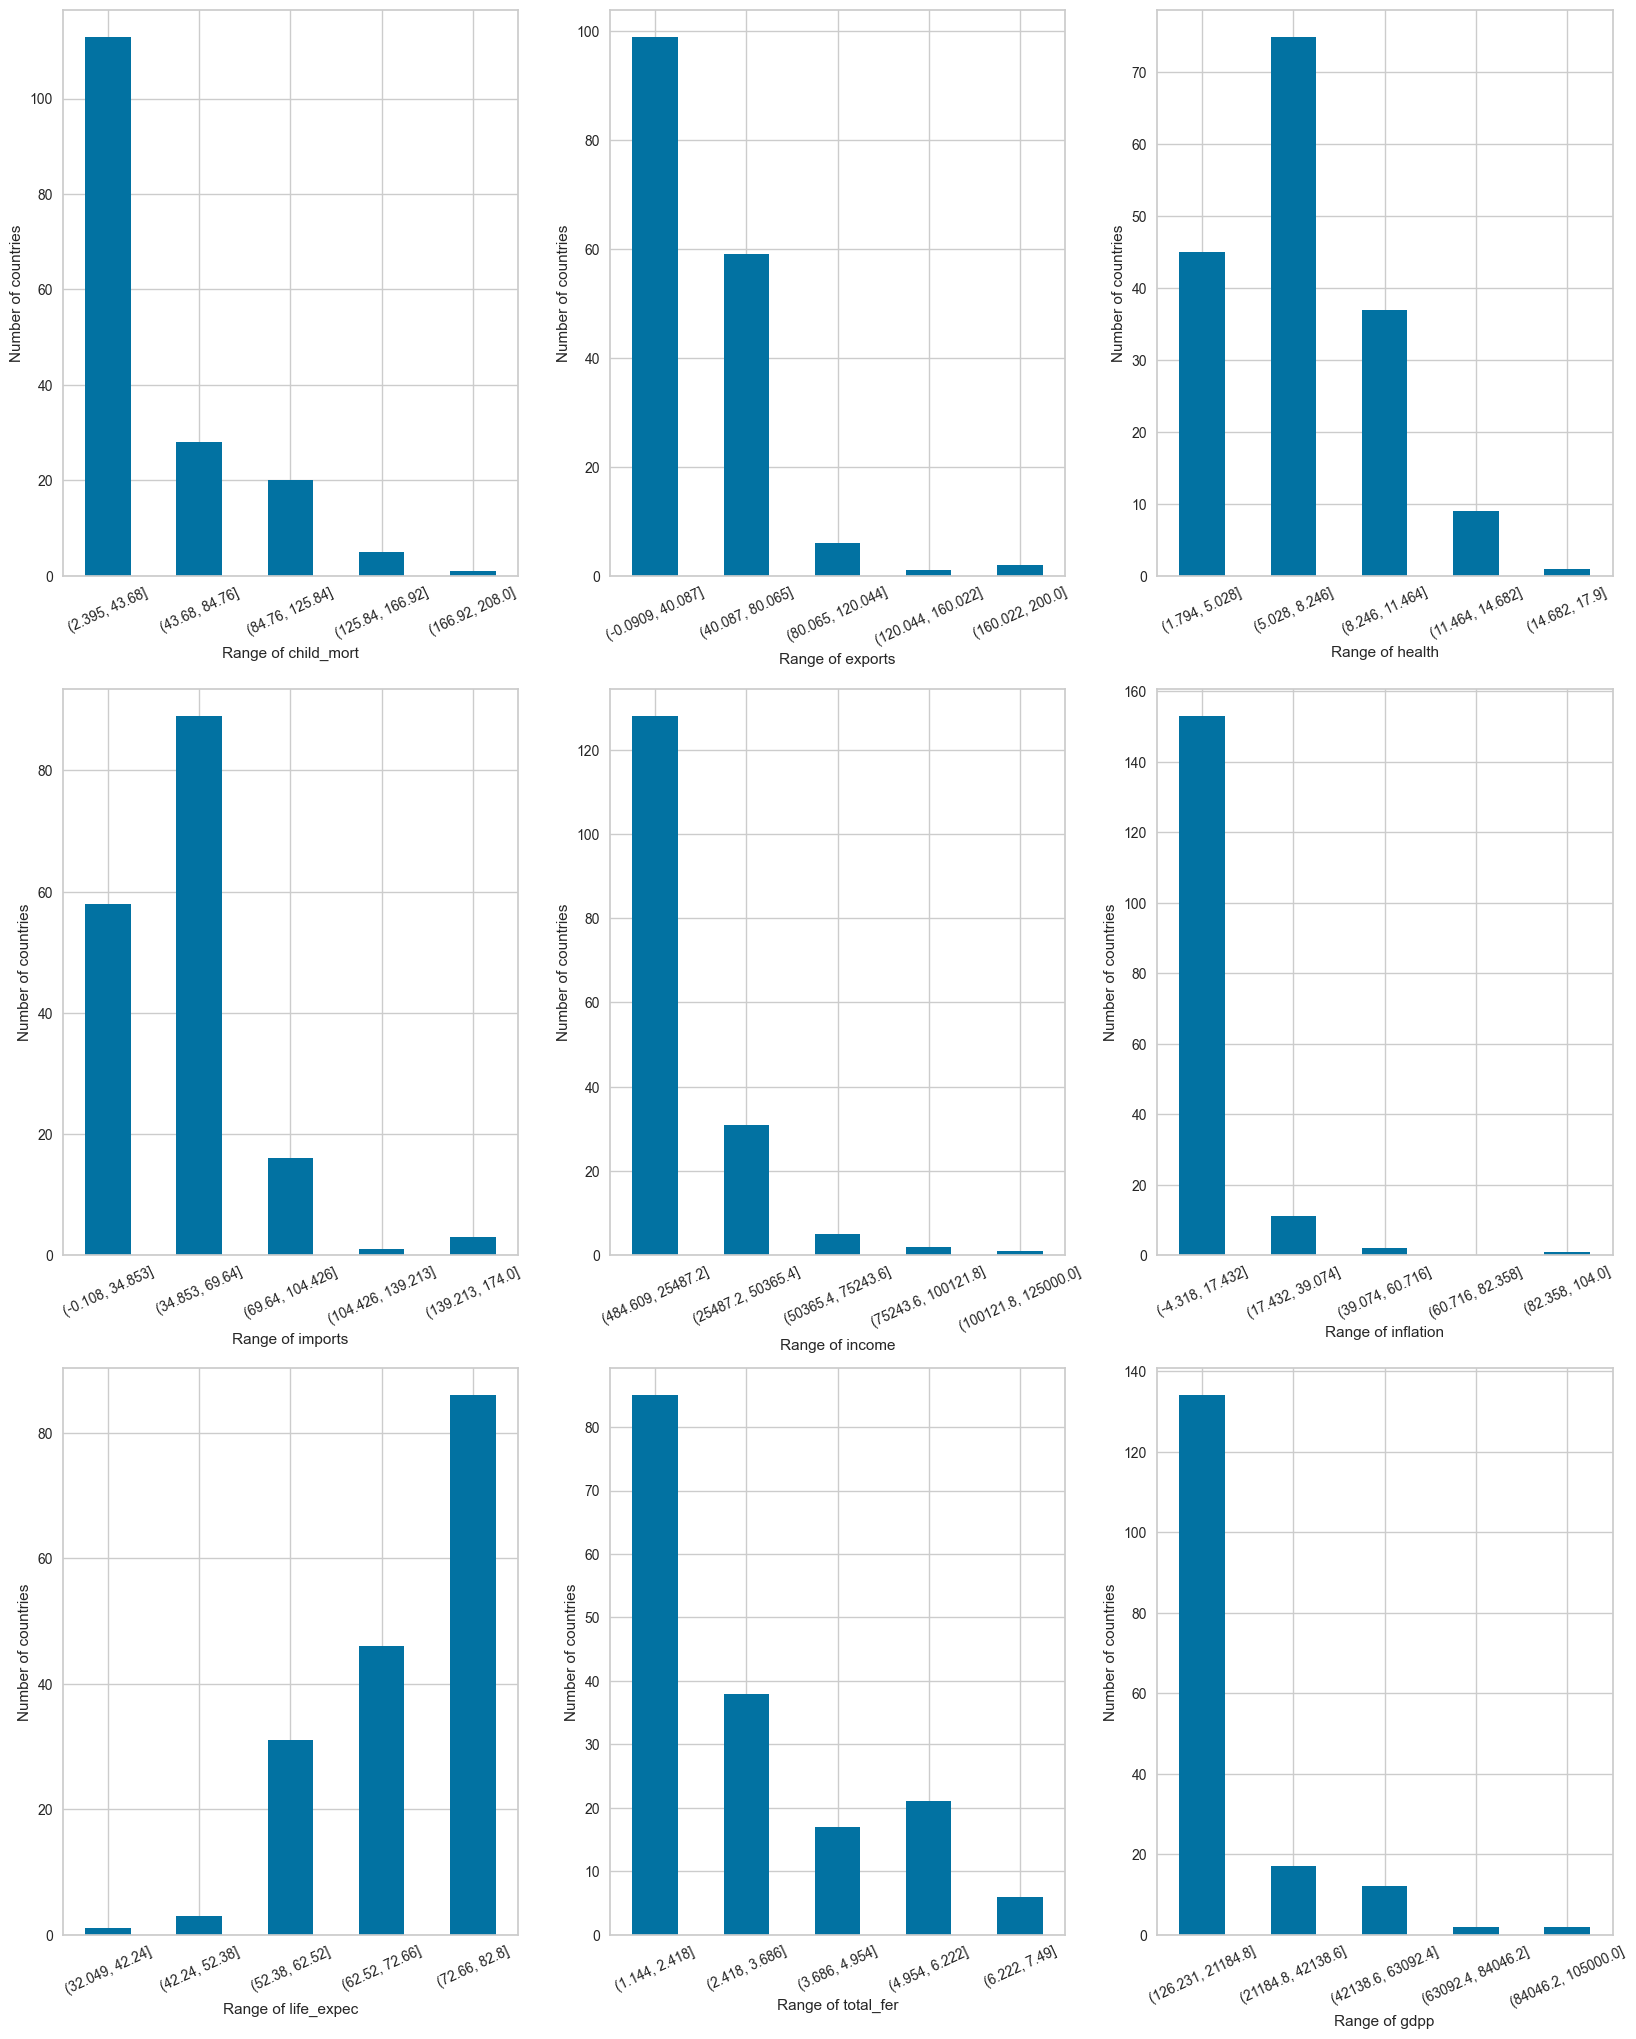

In [124]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = country_df[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

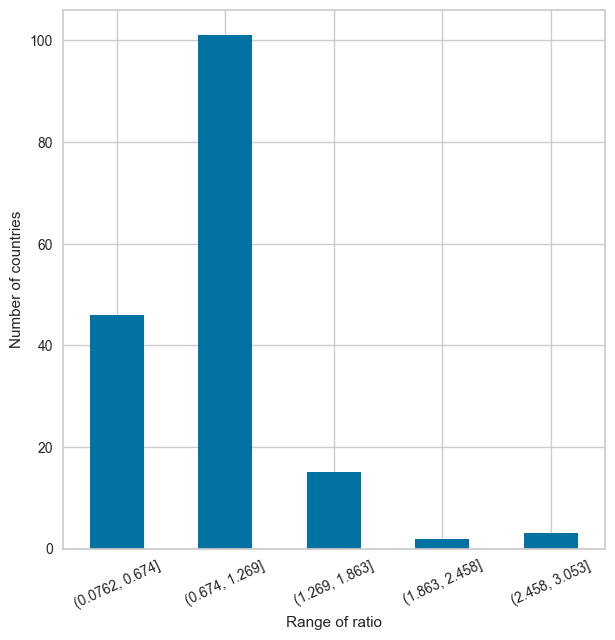

In [125]:
#Calculating export import ratio for countries
new_Da = country_df.copy()
new_Da["ratio"] = country_df["exports"]/country_df["imports"]
temp = pd.cut(x = new_Da["ratio"],bins = 5)
bin_counts = temp.value_counts().sort_index()
plt.xlabel("Range of ratio")
plt.ylabel("Number of countries")
bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

From the above plot we can infer that around 50% of the countries have equal amount of exports and imports showing their developing nature. Countries with less exports but higher imports shows their underdeveloped nature as depicted by the range of ratio (0.0762,0.674]. There are some countries showing their developed nature with higher export import ratio (>1).

## Vizualize the scaled data

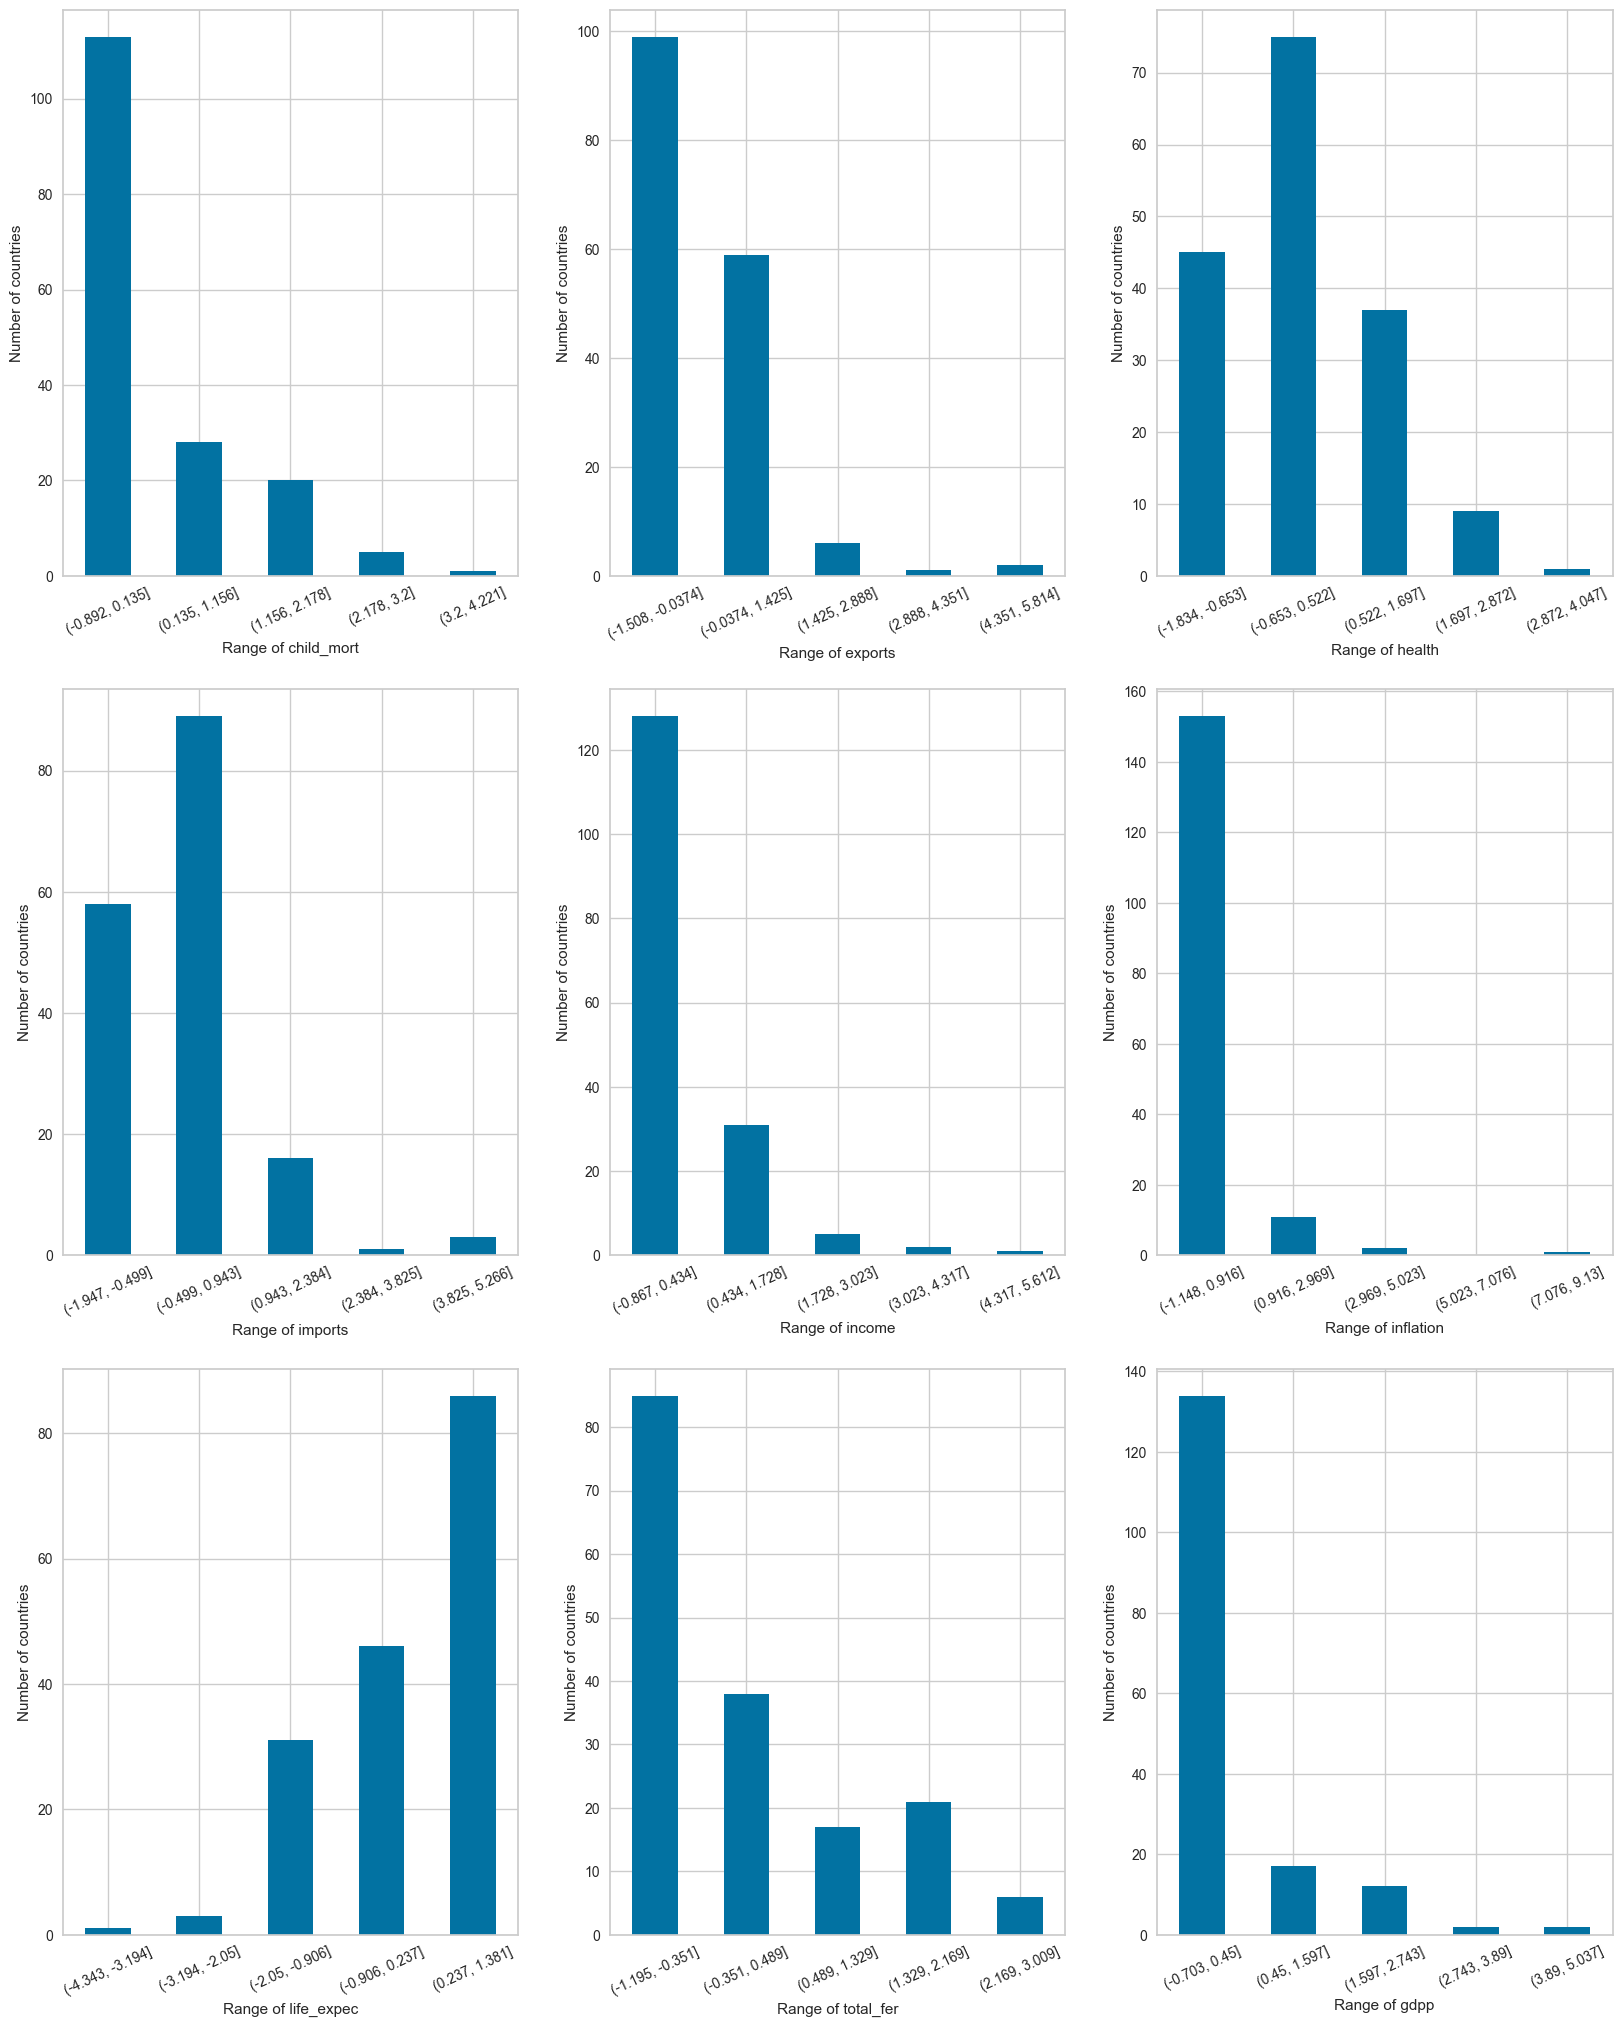

In [126]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Selecting essential features using PCA

In [127]:
#Using pca to select essential features which we will use later to fit the models.
pca = PCA()
pca.fit(X_scale)

PCA()

In [128]:
#Calculating explained variance ratio of different features in dataset
expalined_variance_ratio=pca.explained_variance_ratio_

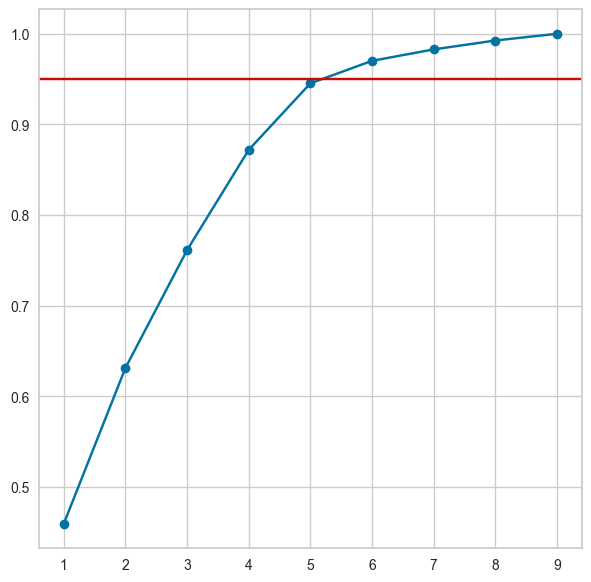

In [129]:
#Plotting the explained variance ratio to get n_components
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

From the plot, we can infer that for around 95% of variance, we should take n_components=5

## Transforming Data

In [130]:
#Transforming the dataset to n_components = 5 using pca
pca=PCA(n_components=5)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,6)])
X_transform


PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

## K_means clustering

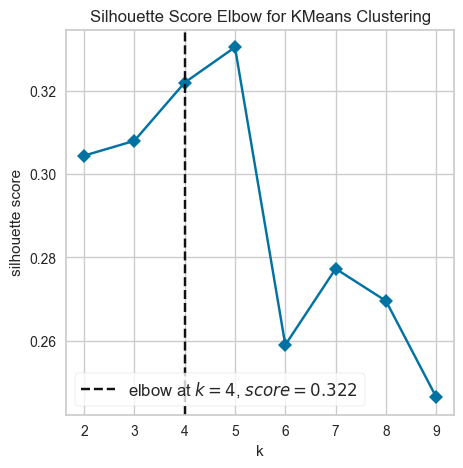

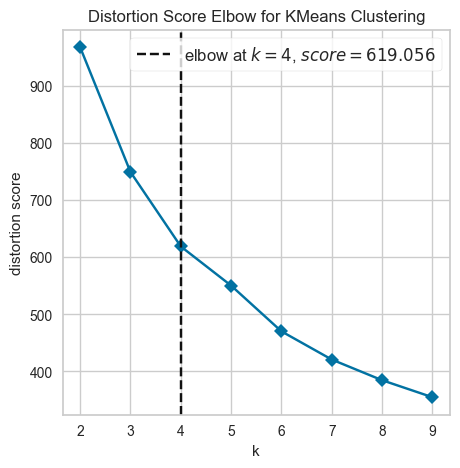

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
#Using elbow method to calculate optimal number of clusters
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

#elbow method by using Silhouette score
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

#elbow method by using distortion score
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),timings=False)
visualizer.fit(X_transform)
visualizer.show()

From the plots, we can infer that optimal number of cluster for KMeans is four

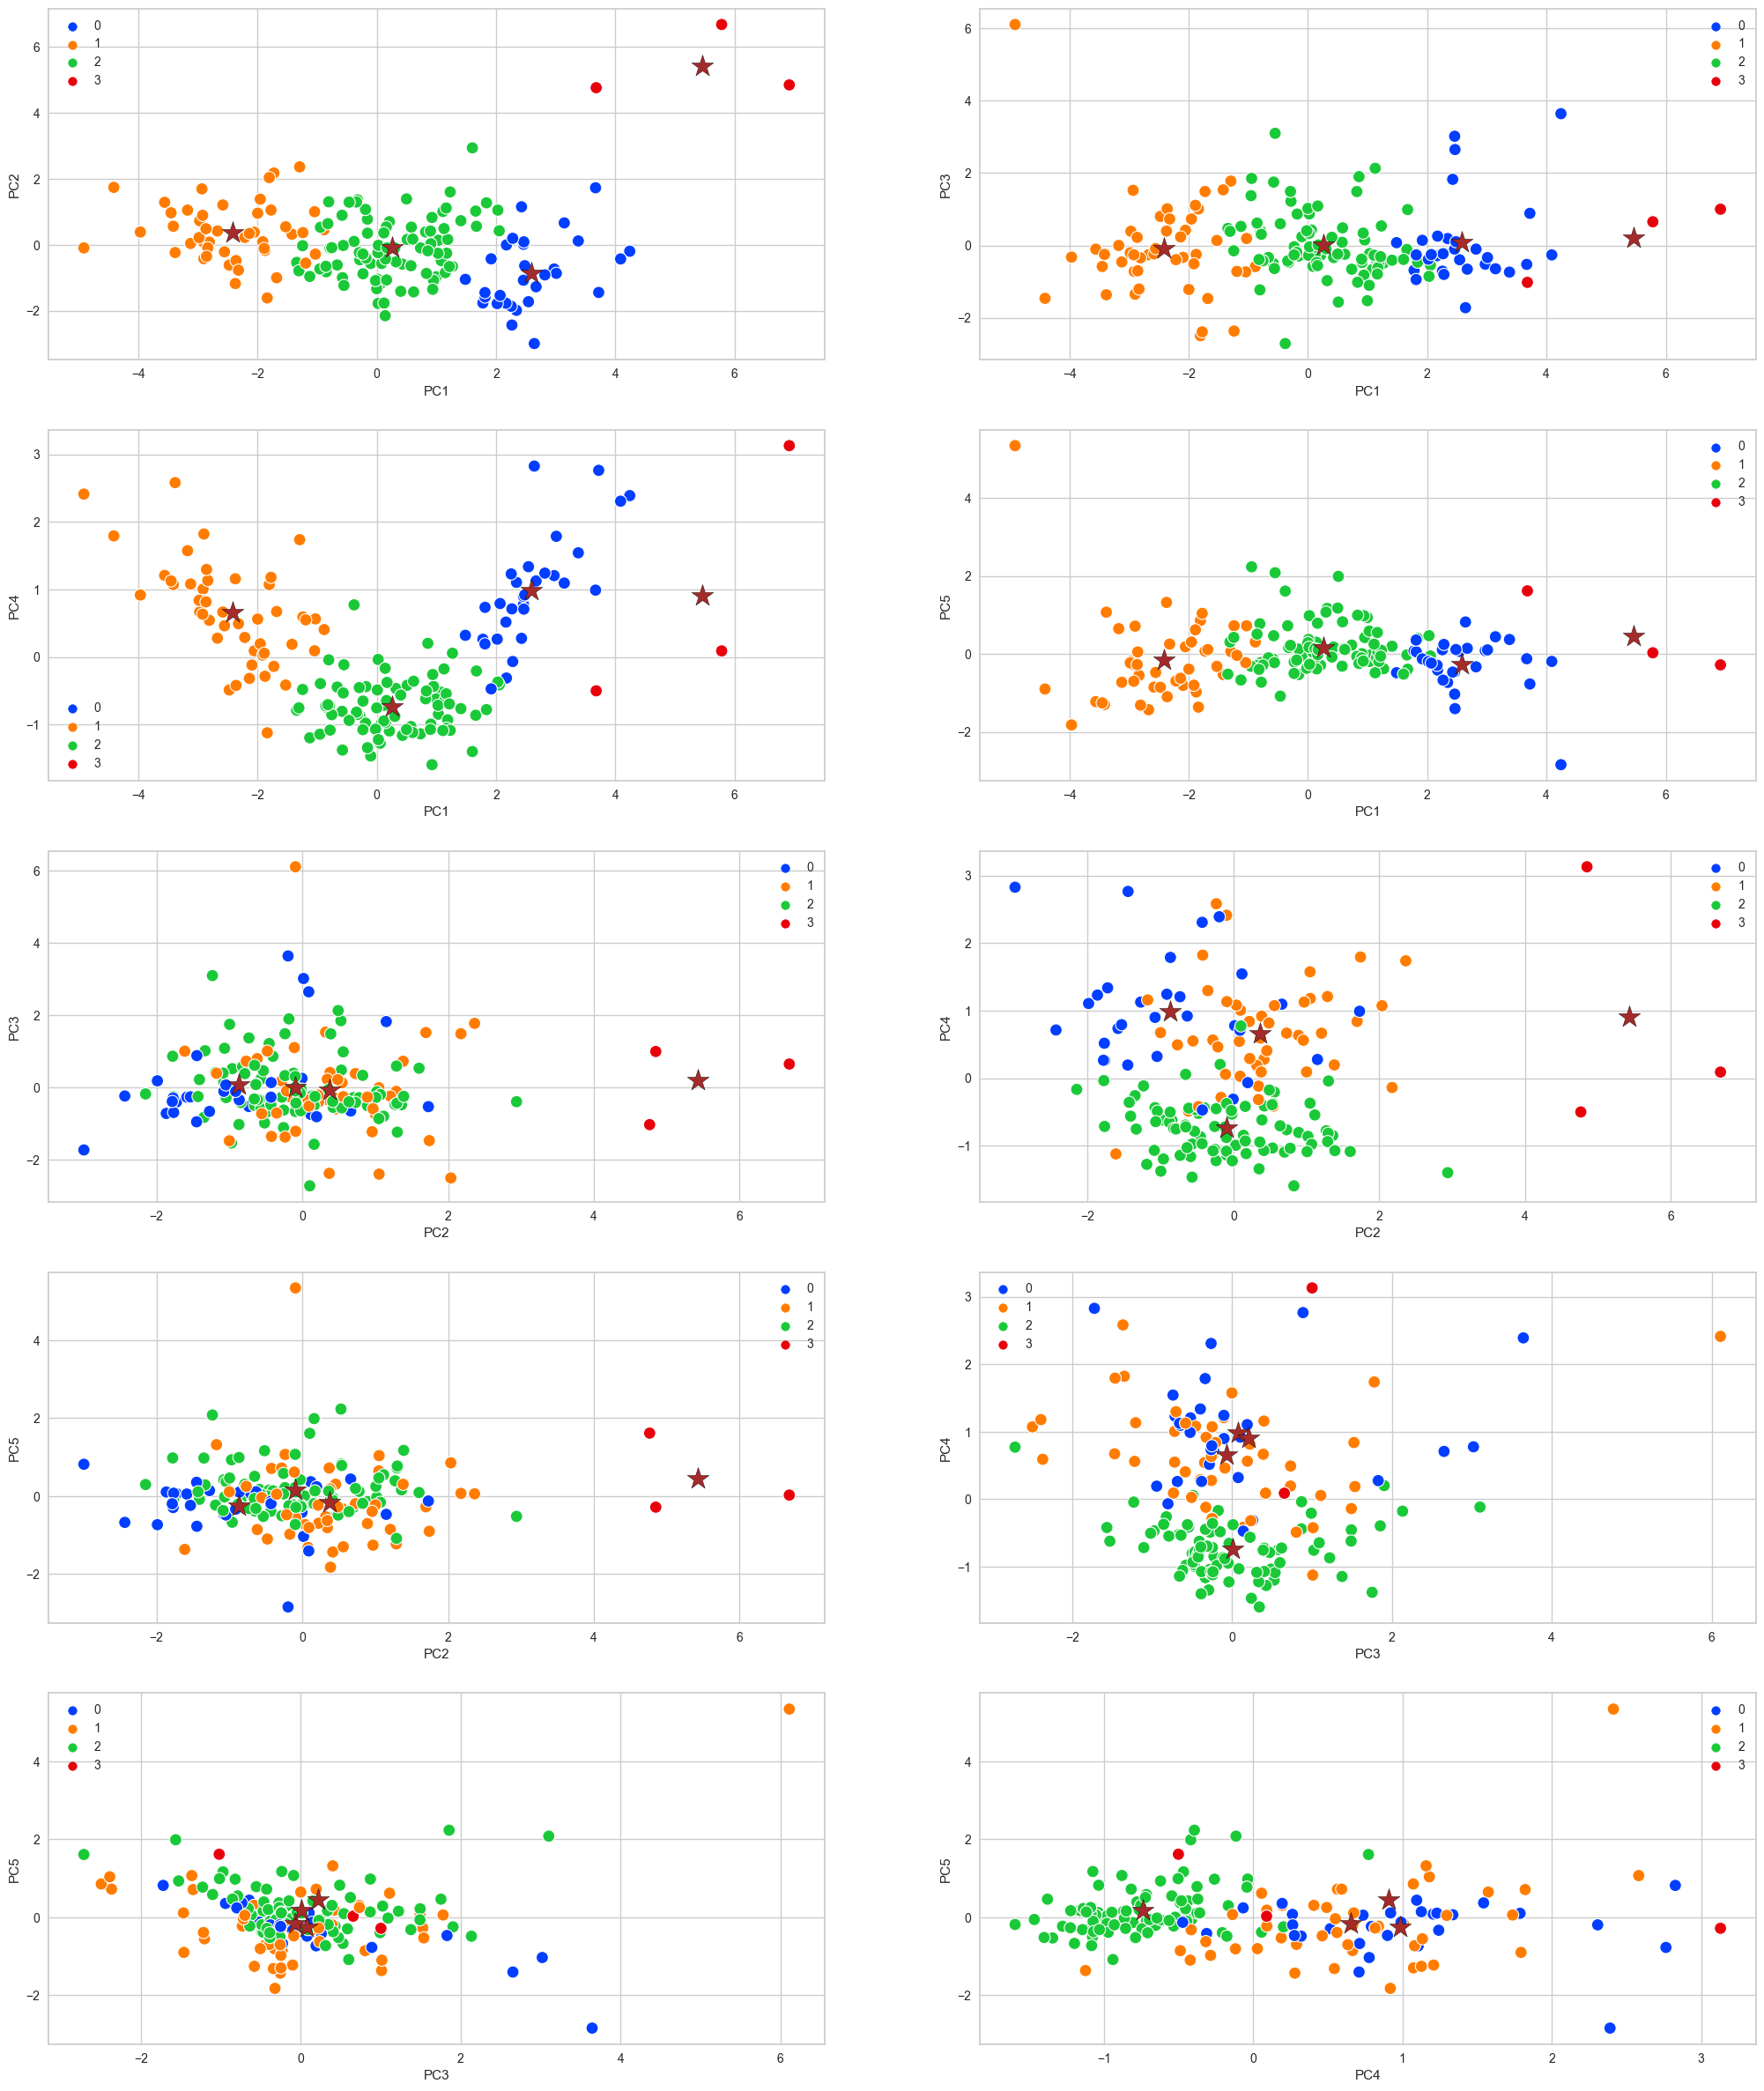

In [132]:
#Assigning cluster labels to datapoints using KMeans
models_kmeans = KMeans(n_clusters = 4)
clusters = models_kmeans.fit_predict(X_transform)

#Plotting the clusters with the datapoints and centroids
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns

#Centroids
centroids_kmeans = models_kmeans.cluster_centers_

for j in range(len(cols)):
  for k in range(j,len(cols)):
    #We do not want to plot for same feature vs same feature
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      #Plotting cluster
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100,alpha = 1)
      #PLotting centroids
      ax.scatter(centroids_kmeans[:,j],centroids_kmeans[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

From the plots, we can infer that PC1 and PC2 are seperating the clusters very effectively while other features are not performing well

In [133]:
#Storing the cluster labels we got from KMeans into a numpy array
country_labels_kmeans = models_kmeans.labels_
country_labels_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [134]:
#Calculating percentage of points in each clusters
unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 30	17.96%
Class 1: 48	28.74%
Class 2: 86	51.50%
Class 3: 3	1.80%



## Gaussian Clustering

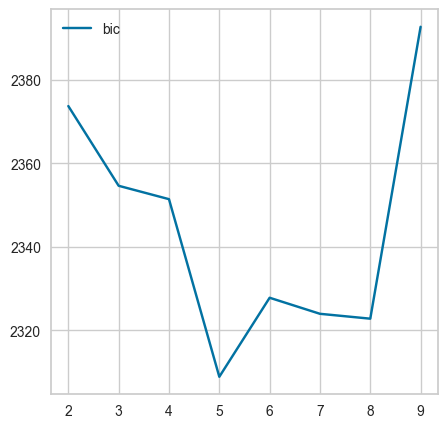

5

In [135]:
#Calculating optimal value for n_components for Gaussian mixture by minimizing the BIC(Bayessian information criterion)
bic = []
for n in range(2,10):
    temp = GaussianMixture(n_components=n)
    temp.fit(X_transform)
    bic.append(temp.bic(X_transform))
plt.plot(range(2,10),bic,label = 'bic')
plt.legend()
plt.show()
k = (bic.index(min(bic)) + 2)
k

So optimal value of n_components for Gaussian mixture is 4 same as KMeans model

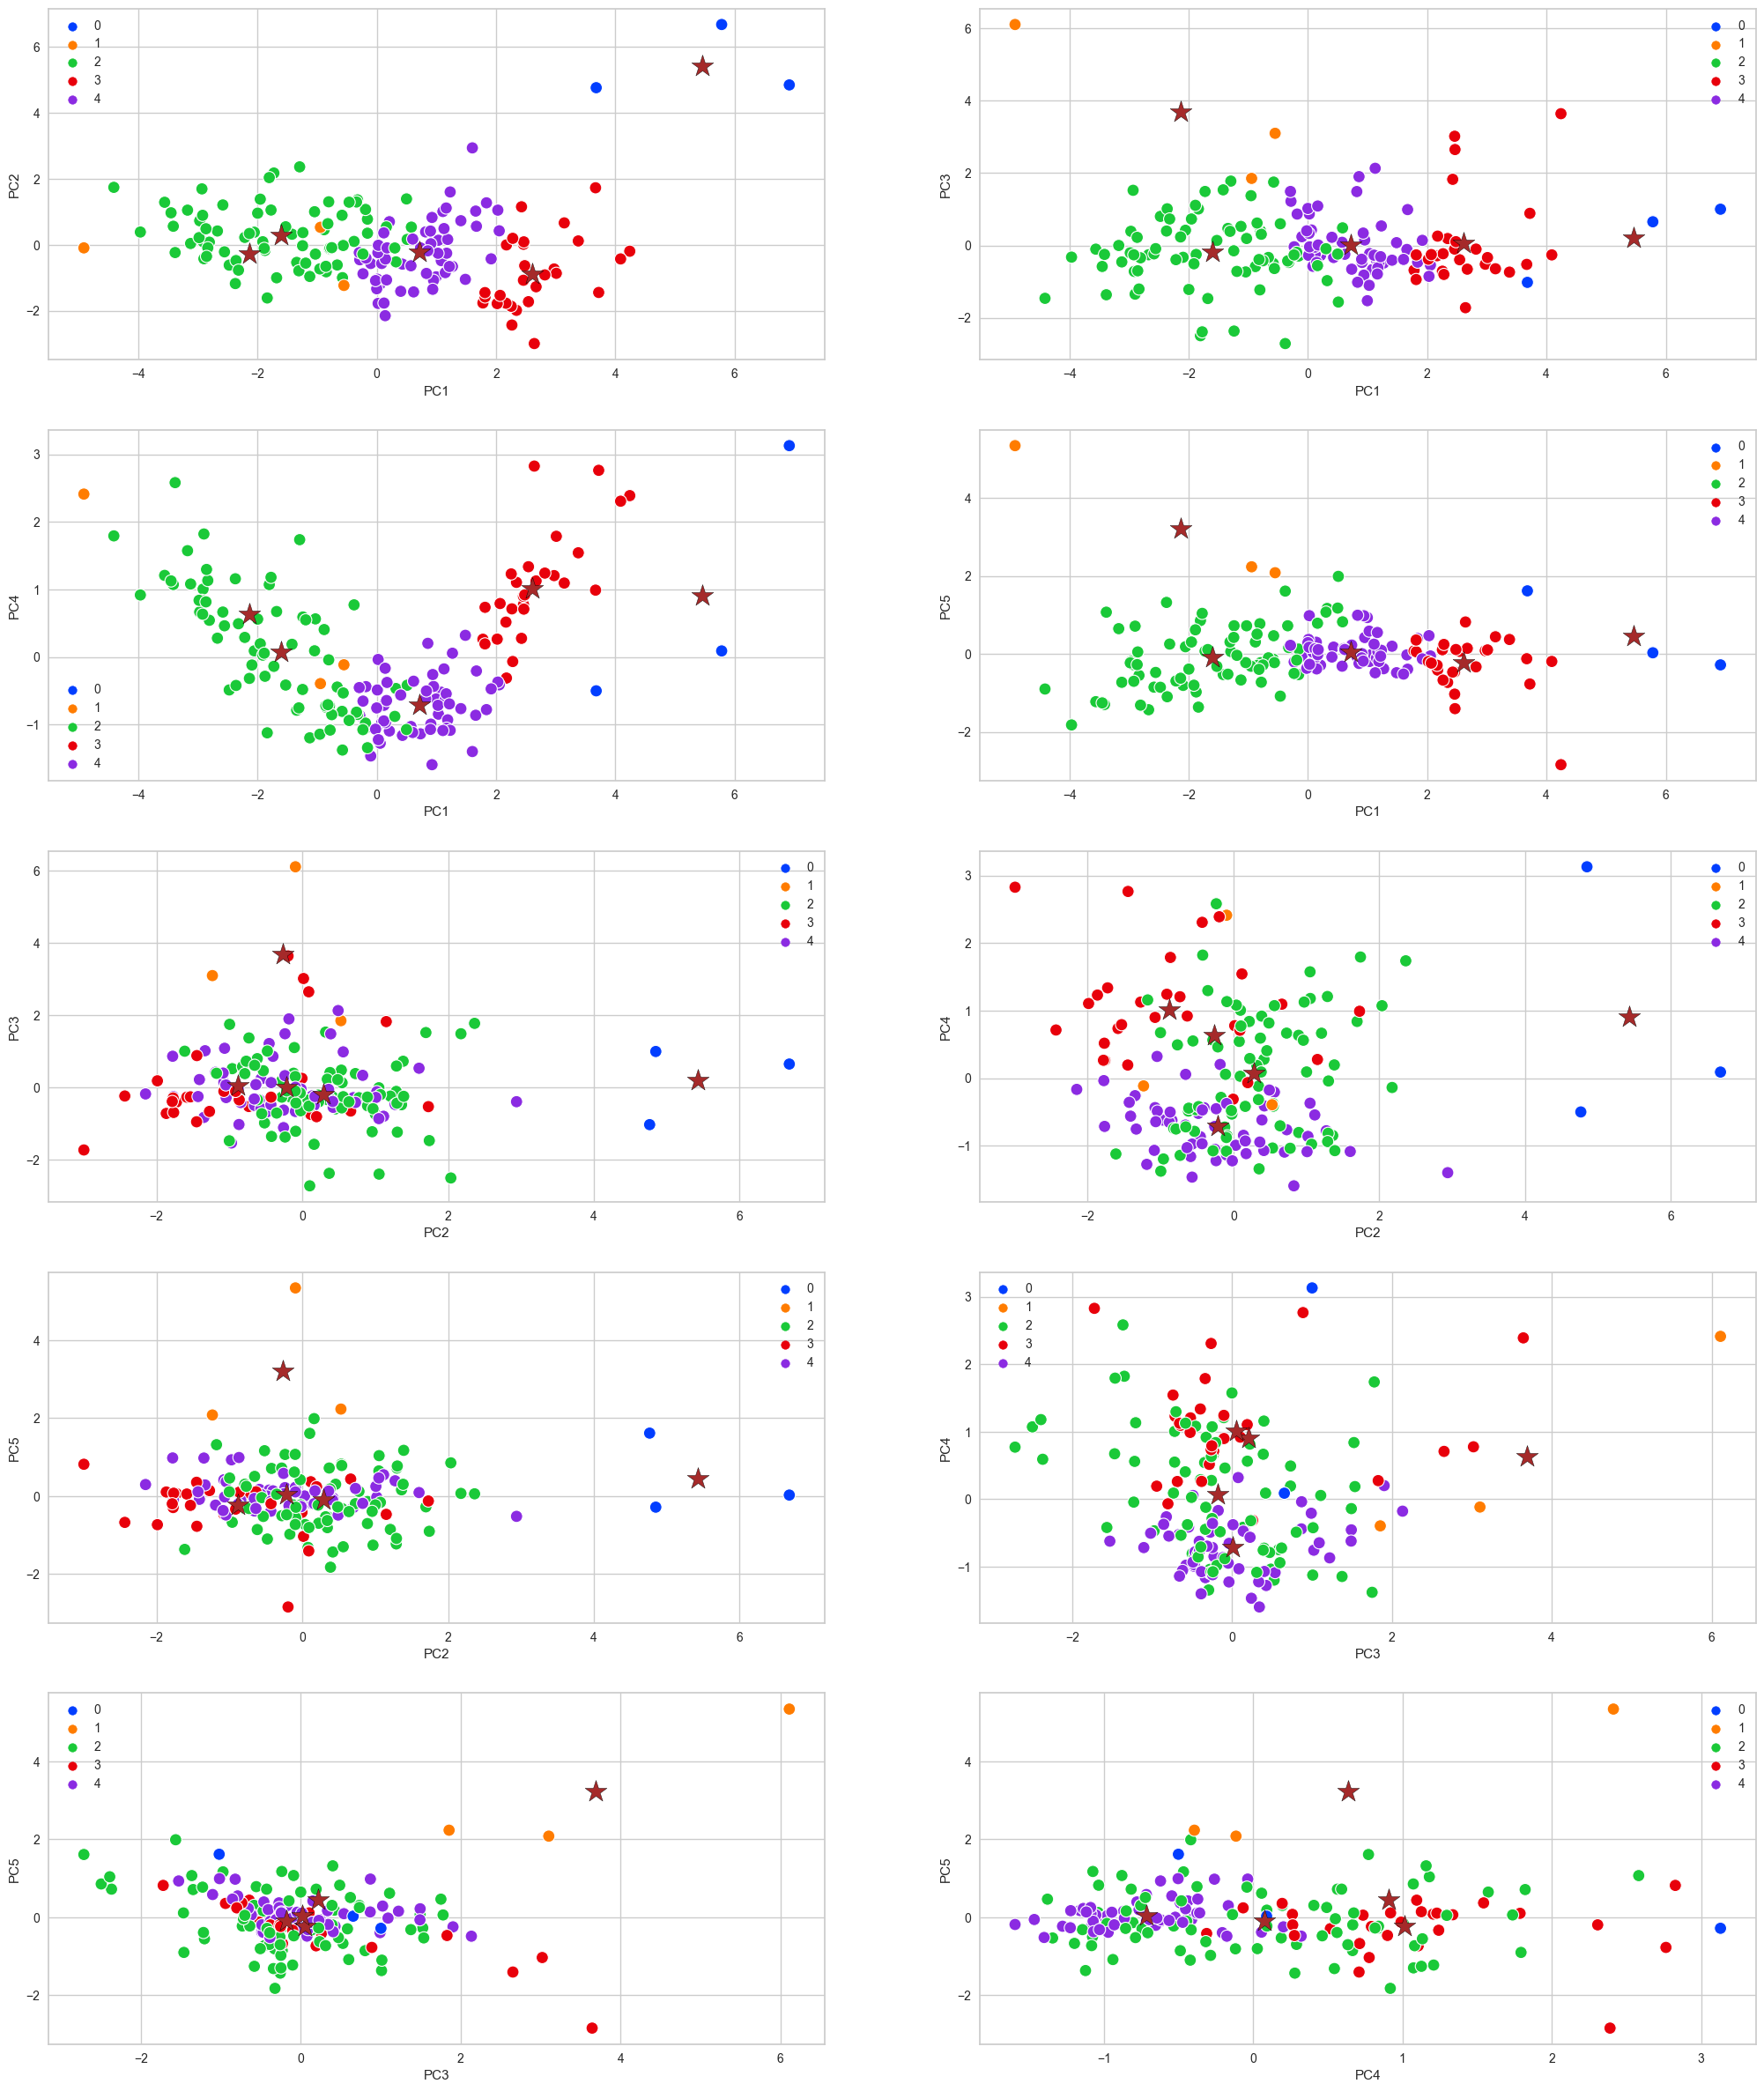

In [136]:
#Performing Gaussian mixture modelling on data with n_components = 4
gmm = GaussianMixture(n_components=k)
gmm.fit(X_transform)

country_labels_gaussian = gmm.predict(X_transform)
#Centroids
centroids_guassian = gmm.means_

#Plotting the clusters and centroids as done in KMeans part
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_gaussian,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_guassian[:,j],centroids_guassian[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [137]:
#Calculating percentage of datapoints in each cluster
unique_labels, counts = np.unique(country_labels_gaussian, return_counts=True)
percentages = counts / len(country_labels_gaussian) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 3	1.80%
Class 1: 3	1.80%
Class 2: 77	46.11%
Class 3: 28	16.77%
Class 4: 56	33.53%



## Hierarchial Clustering

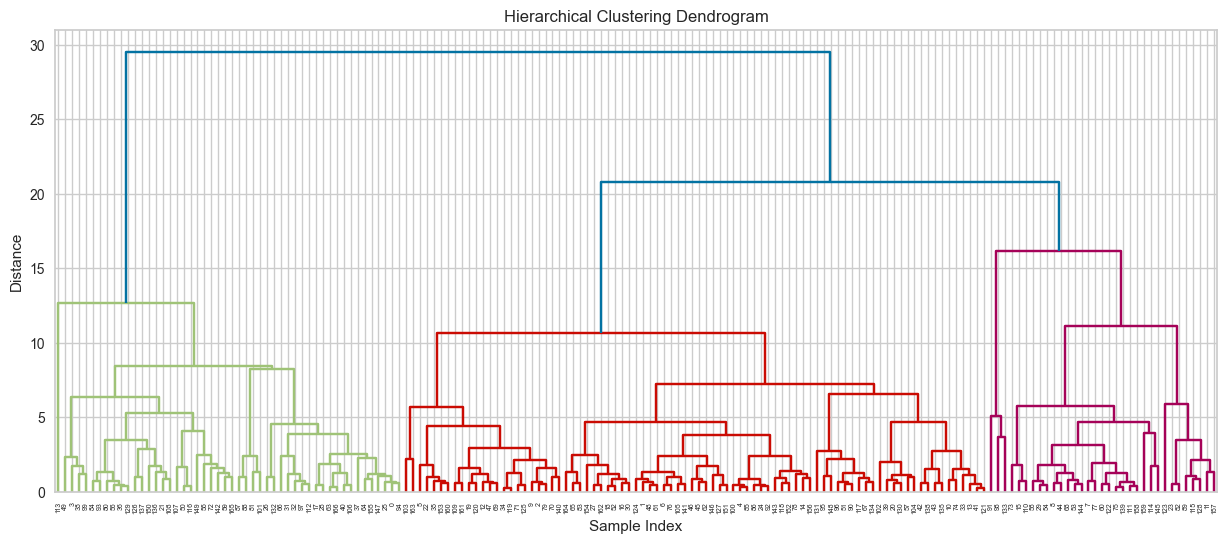

In [138]:
#Calculating optimal value of n_clusters for Agglomerative Clustering


Z = linkage(X_transform, method='ward', metric='euclidean')
#Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

Optimal value of n_cluster for Agglomerative Clustering is 3

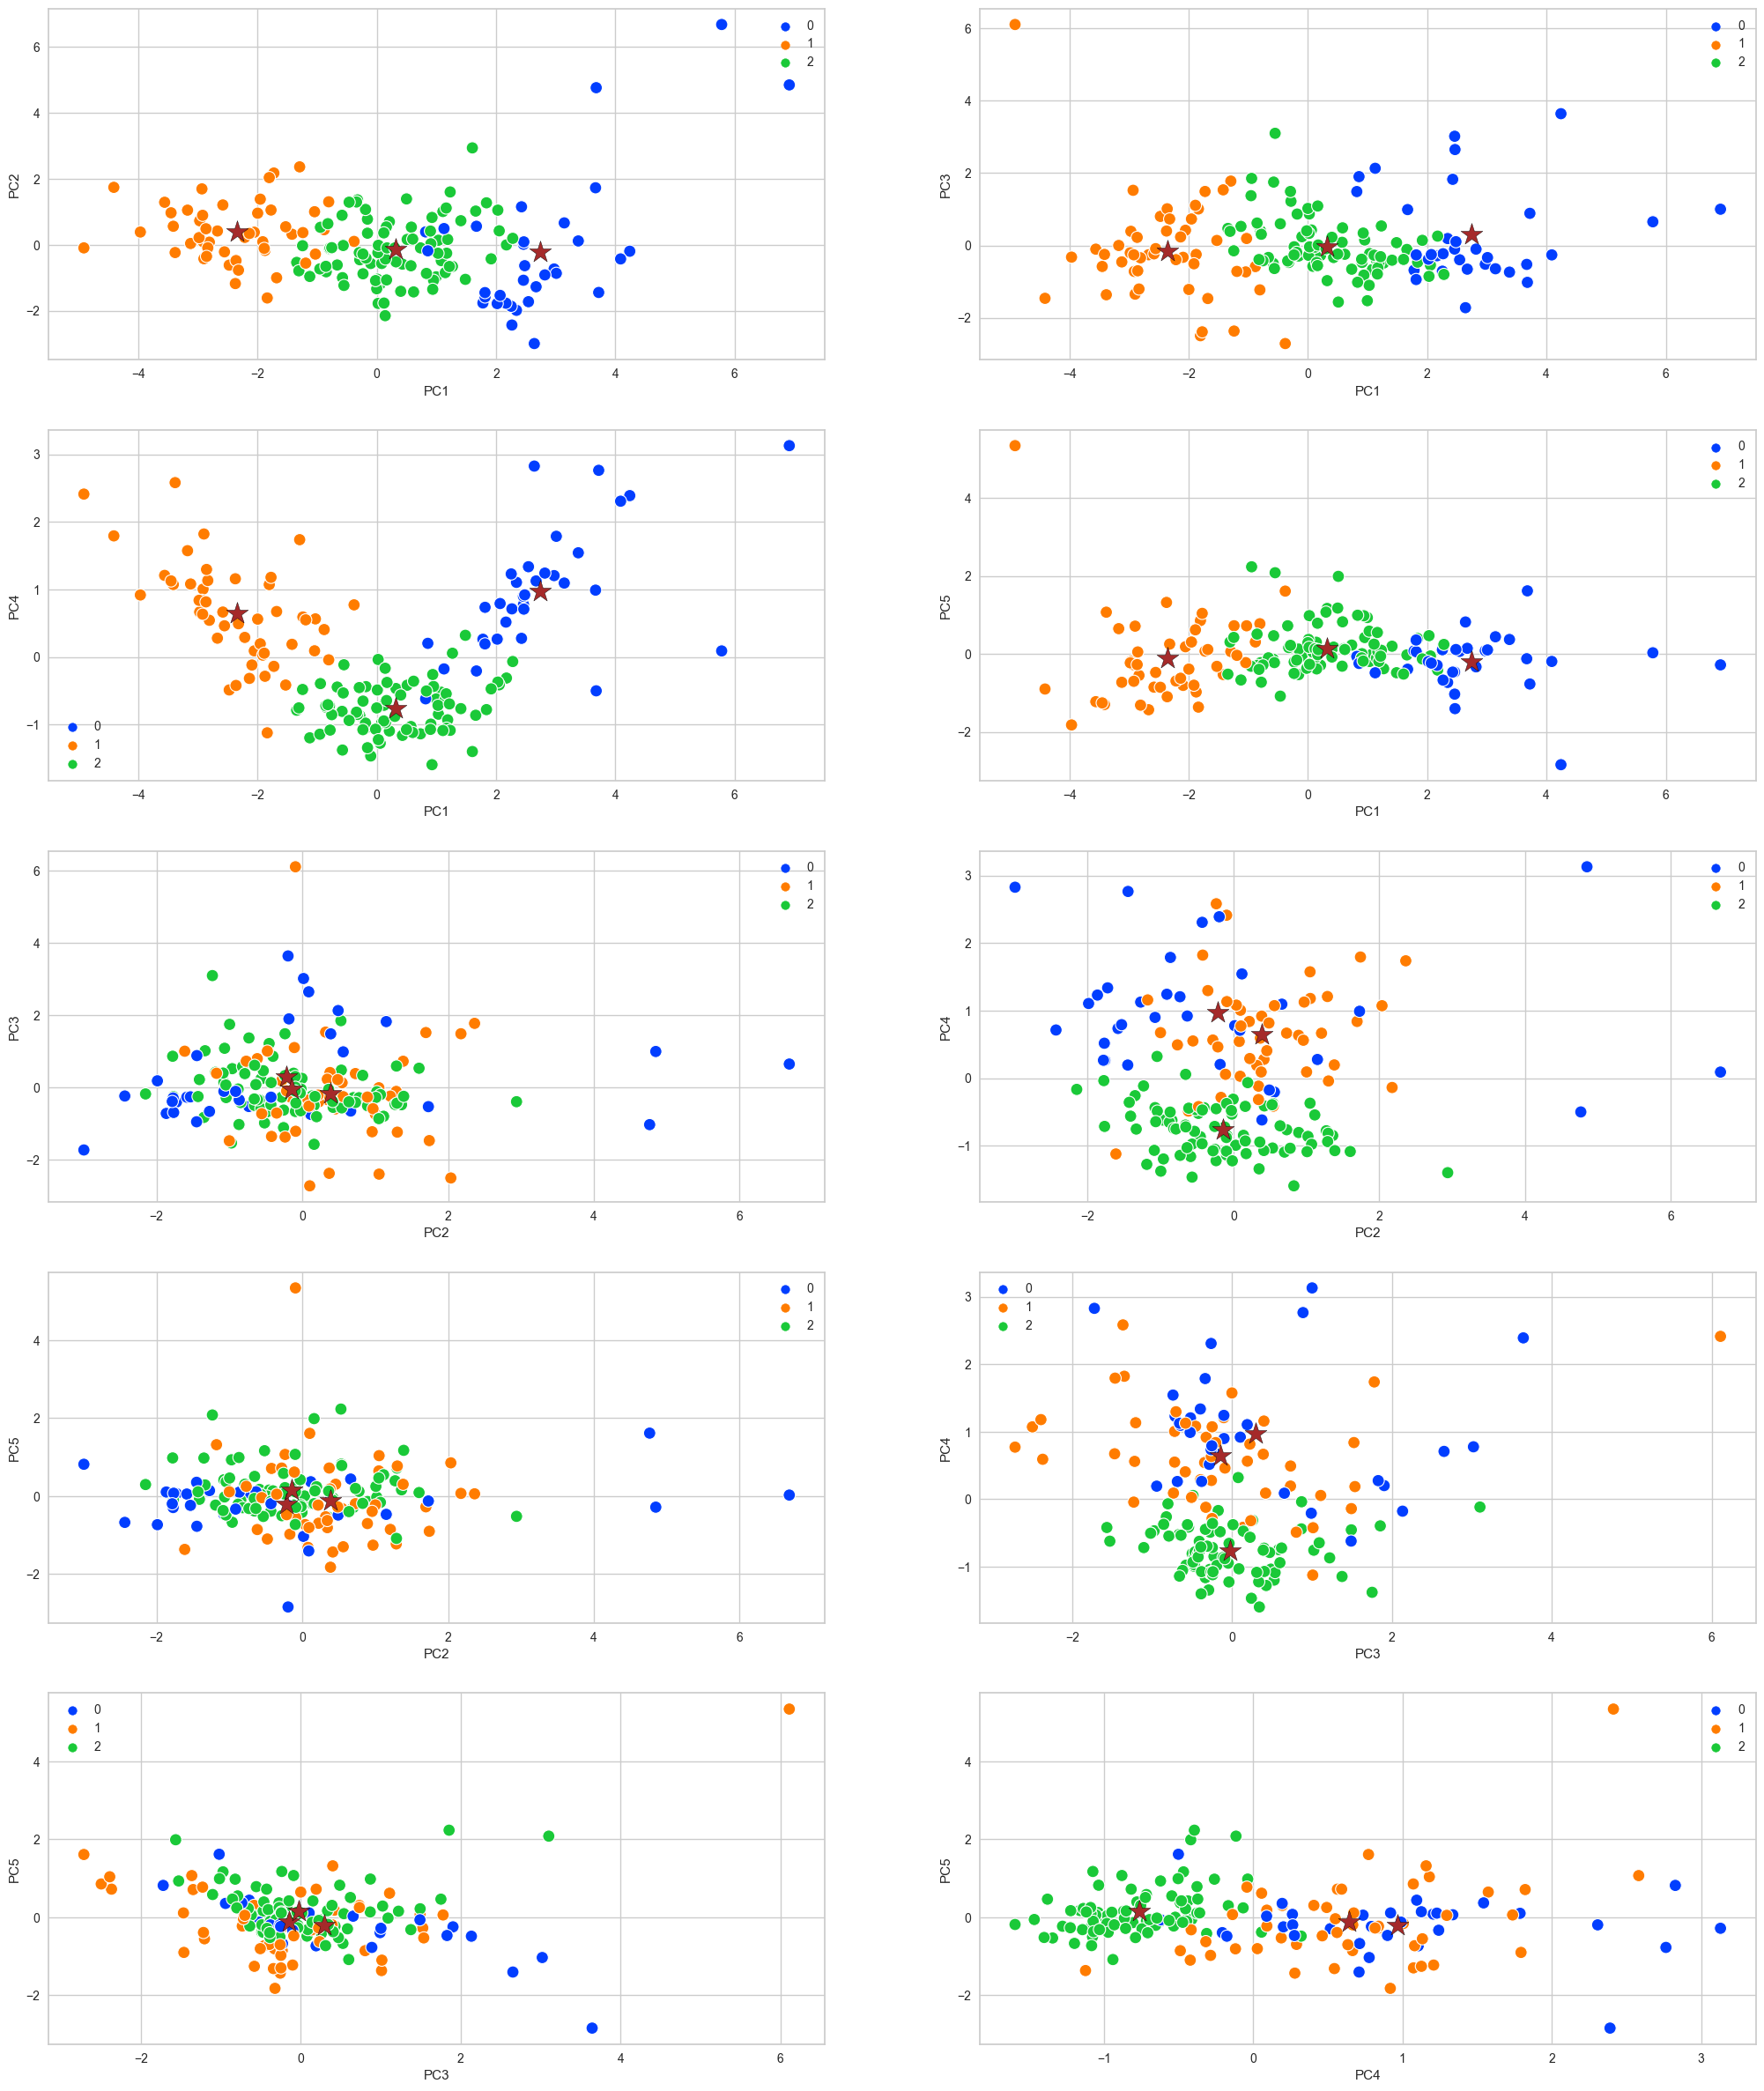

In [139]:
#Fitting Agglomerative Clustering model on data with n_clusters = 3
model_hir_agg = AgglomerativeClustering(n_clusters=3)
model_hir_agg.fit(X_transform)
country_labels_hir_agg = model_hir_agg.labels_

#Plotting the clusters
X_transform['country_labels_hir_agg']=country_labels_hir_agg
centroids_hir_agg=X_transform.groupby('country_labels_hir_agg').mean().values
X_transform.drop('country_labels_hir_agg',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_hir_agg,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_hir_agg[:,j],centroids_hir_agg[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [140]:
#Calculating percentage of datapoints in each cluster

unique_labels, counts = np.unique(country_labels_hir_agg, return_counts=True)
percentages = counts / len(country_labels_hir_agg) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 33	19.76%
Class 1: 50	29.94%
Class 2: 84	50.30%



## DBSCAN Clustering

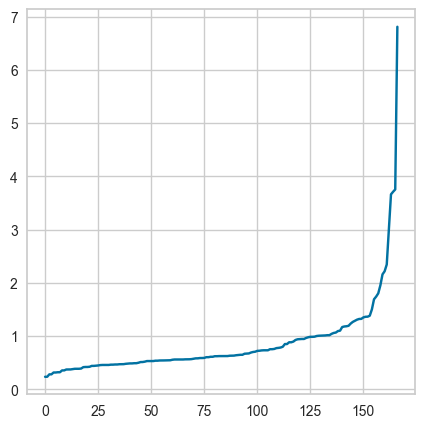

In [141]:
from sklearn.neighbors import NearestNeighbors

#Calculating optimal value for eps for DBSCAN algorithm on the given dataset
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transform)
distances, indices = nbrs.kneighbors(X_transform)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 5,5
plt.plot(distances)

By observing the plot, we can infer that we are getting elbow at around eps = 1.5

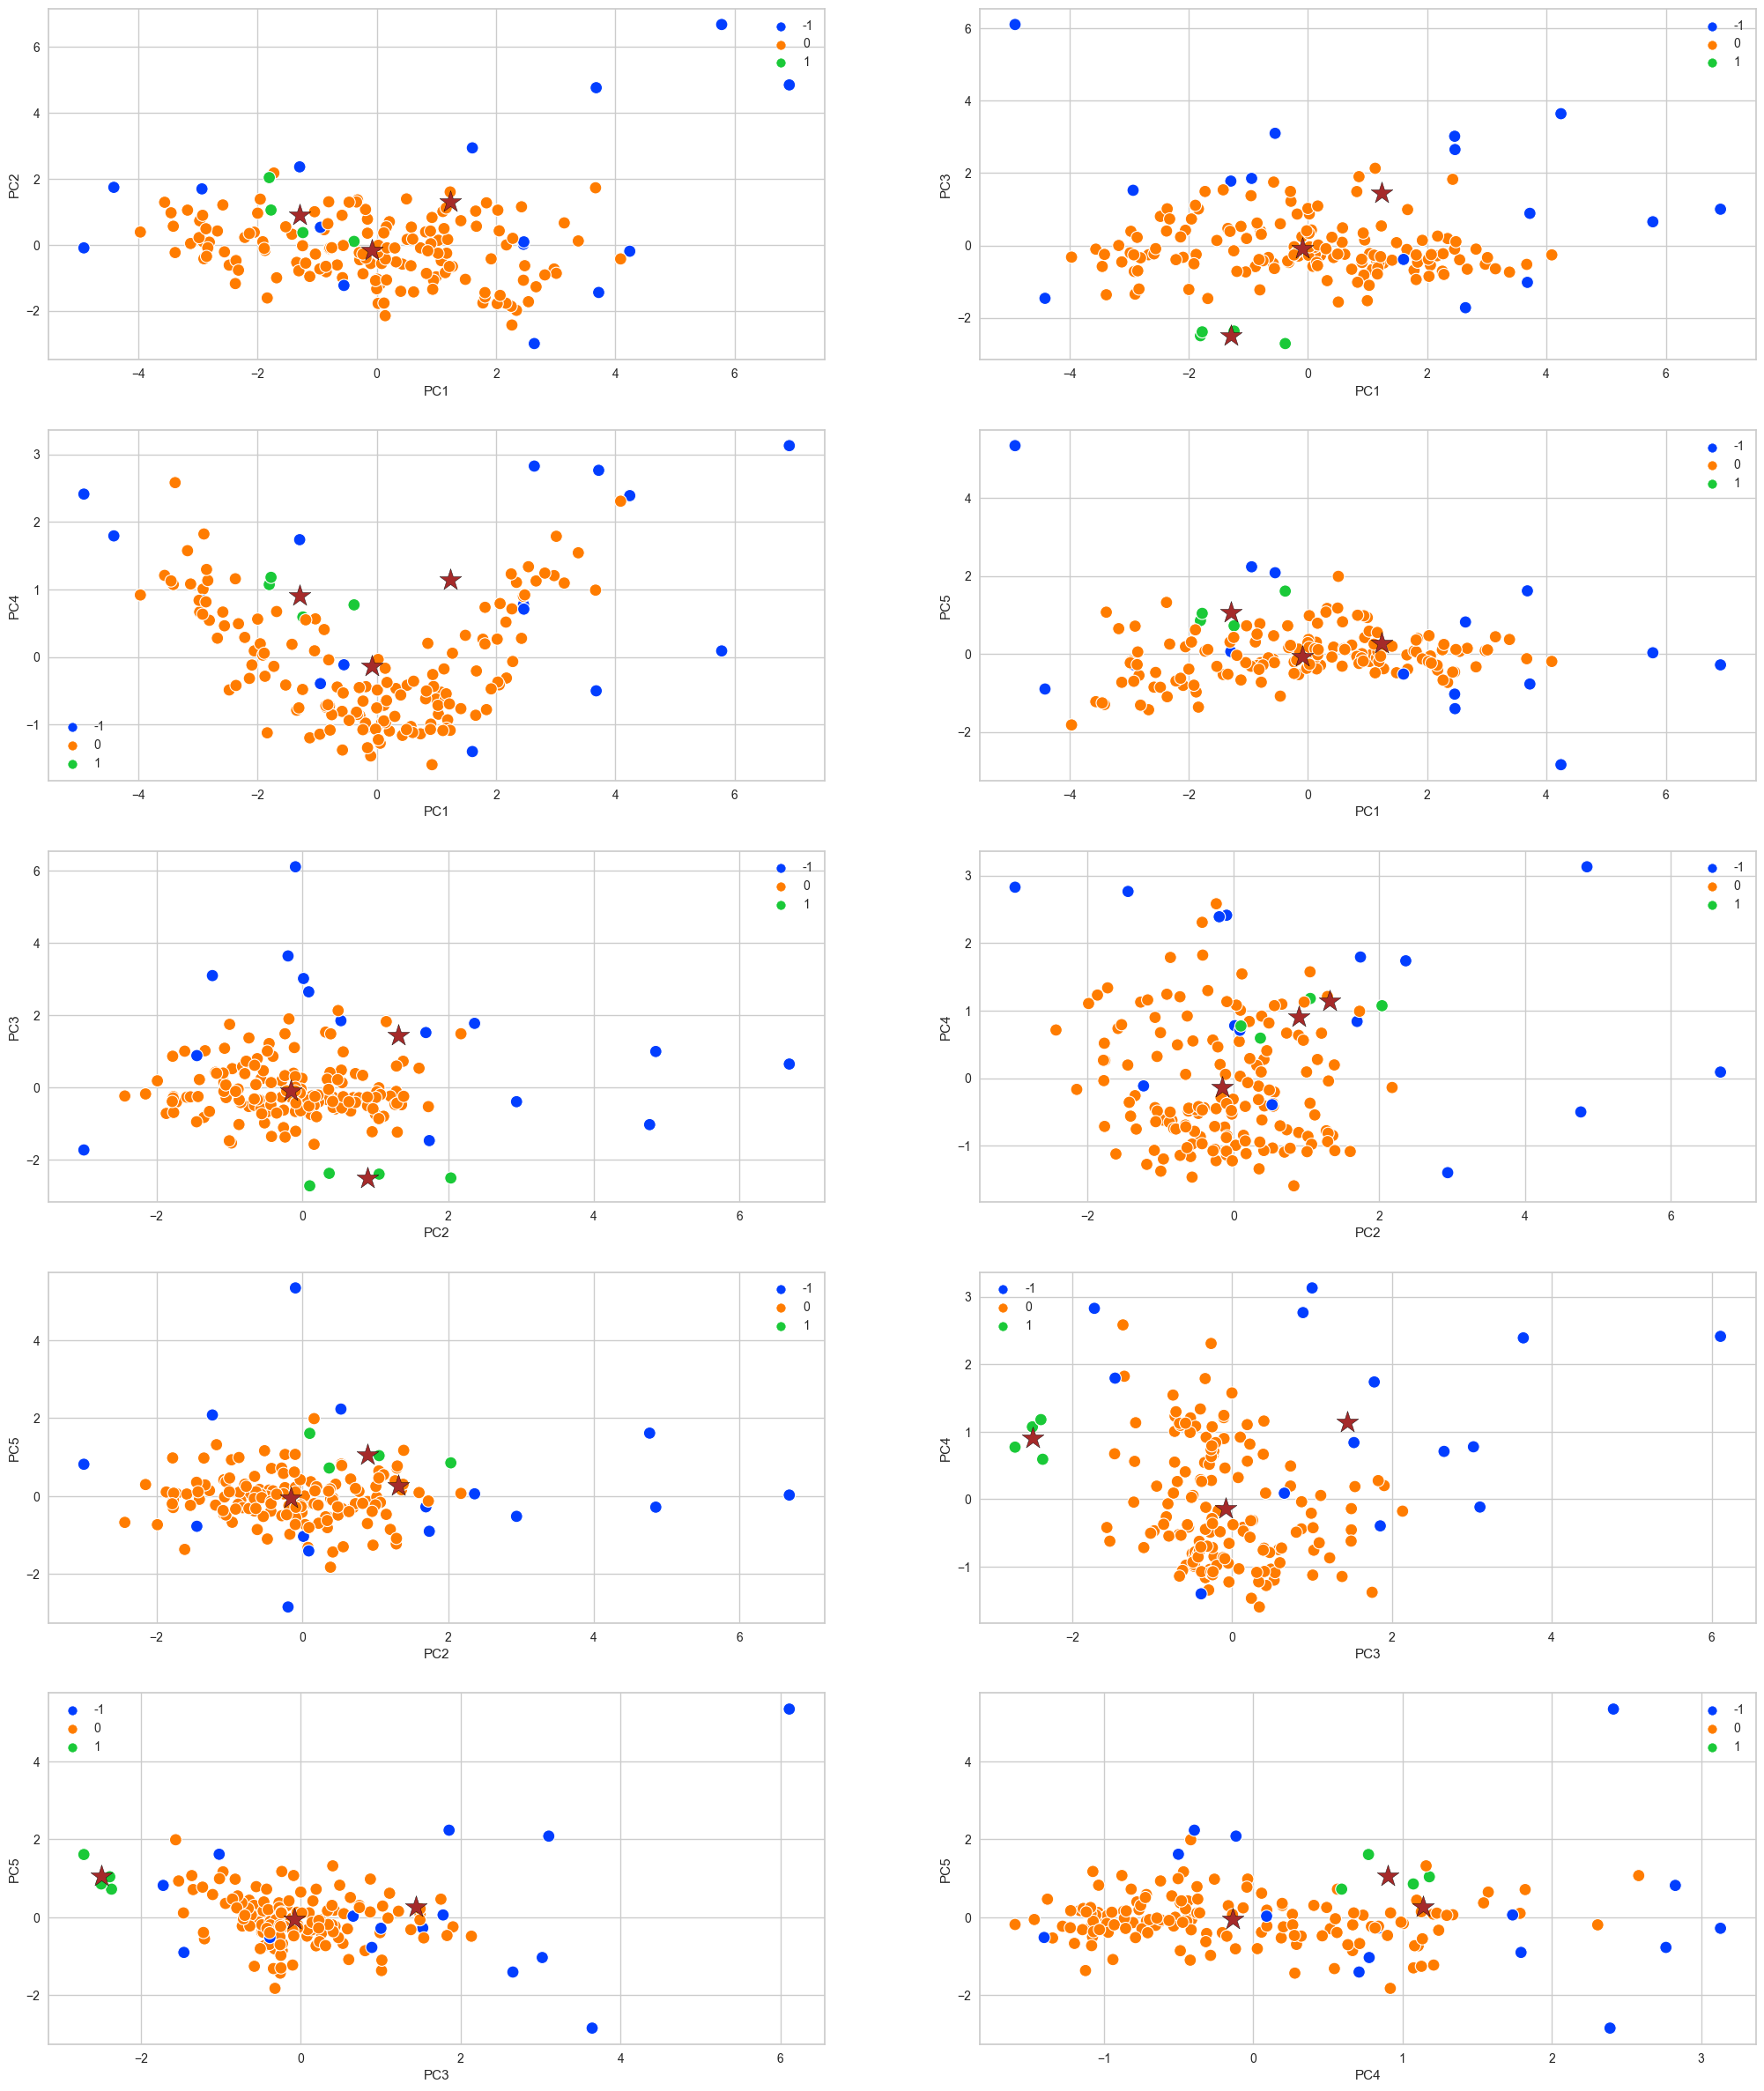

In [142]:
#Fitting a DBSCAN model on the dataset with eps = 1.5 and min_samples = 3
#Here we took min_samples = 3 by the observations from previous clusters where we are getting a cluster with only 3 samples
db = DBSCAN(eps = 1.5, min_samples = 3 )# minimum samples is set to 8
db.fit(X_transform)

#Storing the cluster labels that we got from DBSCAN
country_labels_dbscan = db.labels_

#PLotting the clusters
X_transform['country_labels_dbscan']=country_labels_dbscan
centroids_dbscan=X_transform.groupby('country_labels_dbscan').mean().values
X_transform.drop('country_labels_dbscan',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_dbscan,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_dbscan[:,j],centroids_dbscan[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

## Evaluating the Clustering

In [143]:
print("Gaussian",sscore(X_transform, country_labels_gaussian, metric='euclidean'))

Gaussian 0.2370706642469337


In [144]:
print("KMeans",sscore(X_transform,country_labels_kmeans,metric = 'euclidean'))

KMeans 0.32636833851745367


In [145]:
print("alggomorative",sscore(X_transform,country_labels_hir_agg,metric = 'euclidean'))

alggomorative 0.3042718841690557


In [146]:
print("Dbscan",sscore(X_transform,country_labels_dbscan,metric = 'euclidean'))

Dbscan 0.1929253329808842


From the silhouette score of different clustering algorithms, we can observe that KMeans has highest Silhouette score and thus performing best on the dataset. Therefore, we will choose KMeans to cluster the datapoints and predicting the countries that are need of funding from HELP

In [147]:
country_df['labels']=country_labels_kmeans

unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 30	17.96%
Class 1: 48	28.74%
Class 2: 86	51.50%
Class 3: 3	1.80%



In [148]:
#Calculating means of different clusters and sorting them in increasing order of gdpp
sorted_df = country_df.groupby('labels').mean().sort_values(by='gdpp')
sorted_df

child_mort     exports    health     imports        income  inflation  \
labels                                                                          
1        92.366667   28.546229  6.296458   41.443040   3937.770833  11.915938   
2        20.889535   41.769535  6.285465   48.596512  13076.162791   7.417802   
0         4.953333   45.826667  9.168667   39.736667  45250.000000   2.742200   
3         4.133333  176.000000  6.793333  156.666667  64033.333333   2.468000   

        life_expec  total_fer          gdpp  
labels                                       
1        59.345833   4.953958   1902.916667  
2        73.006977   2.285116   6988.069767  
0        80.376667   1.795333  43333.333333  
3        81.433333   1.380000  57566.666667

From this data, we can infer that cluster 1 contains countries with low gdpp, life expectancy, exoprt-import ratio, income and high inflation, total fertility and child mortality while cluster 2 contains highest gdpp, life expectancy, exports-imports, income and lowest inflation, total fertility and child mortality.
In this way we can rank these cluster from highest to lowest in the following manner:
1 -------> Under Developed
0 -------> Developing
3 -------> Developed
2 -------> Fully Developed

In [149]:
#Mapping the rank with cluster labels
label_map = dict(zip(sorted_df.index, ['Under Developed', 'Developing', 'Developed', 'Fully Developed']))
label_map

{1: 'Under Developed', 2: 'Developing', 0: 'Developed', 3: 'Fully Developed'}

In [150]:
#Printing the name of countries in different clusters
for label in (np.unique(country_df['labels'])):
    print(label_map[label])
    print(country_df[country_df['labels']==label].values[:,0])
    print('\n')

Developed
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Netherlands' 'New Zealand' 'Norway' 'Portugal'
 'Qatar' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


Under Developed
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']


Developing
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Baham

In [152]:
country_label_df = country_df.replace([0,1,2,3],['Developing','Under Developed','Fully Developed','Developed'])
country_label_df

country child_mort  exports  health  imports  income  \
0            Afghanistan       90.2     10.0    7.58     44.9    1610   
1                Albania       16.6     28.0    6.55     48.6    9930   
2                Algeria       27.3     38.4    4.17     31.4   12900   
3                 Angola      119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda       10.3     45.5    6.03     58.9   19100   
..                   ...        ...      ...     ...      ...     ...   
162              Vanuatu       29.2     46.6    5.25     52.7    2950   
163            Venezuela       17.1     28.5    4.91     17.6   16500   
164              Vietnam       23.3     72.0    6.84     80.2    4490   
165                Yemen       56.3     30.0    5.18     34.4    4480   
166               Zambia       83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp           labels  
0         9.44        56.2       5.82    553  Under Developed  
1         4.49        76.3       1.65   4090  Fully Developed  
2        16.10        76.5       2.89   4460  Fully Developed  
3        22.40        60.1       6.16   3530  Under Developed  
4         1.44        76.8       2.13  12200  Fully Developed  
..         ...         ...        ...    ...              ...  
162       2.62        63.0       3.50   2970  Fully Developed  
163      45.90        75.4       2.47  13500  Fully Developed  
164      12.10        73.1       1.95   1310  Fully Developed  
165      23.60        67.5       4.67   1310  Under Developed  
166      14.00        52.0       5.40   1460  Under Developed  

[167 rows x 11 columns]

In [111]:
!pip install geopandas
import geopandas as gpd

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [112]:
import tensorflow_hub as hub
import tensorflow as tf

from_country = country_df['country']
to_country = world['name']

#GloVe embeddings
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

similarity_score=[]
# Mapping function
def map_country_names(name):
    max_similarity = 0
    best_match = None
    for country_name in to_country:
        similarity = embed([name.lower()]).numpy().dot(embed([country_name.lower()]).numpy().T)
        if similarity > max_similarity:
            best_match = country_name
            max_similarity = similarity
    similarity_score.append(max_similarity)
    return best_match

map_list=[]

#Map from_country to to_country
map_dict_country={}
for name in from_country:
    mapped_name = map_country_names(name)
    map_dict_country[name]=mapped_name
    map_list.append(mapped_name)

ModuleNotFoundError: No module named 'tensorflow_hub'

In [ ]:
map_dict_country

In [ ]:
#GloVe mapped
cnt=0
for i in map_dict_country:
    if(map_dict_country[i]!=i):
        print(i,'<-->',map_dict_country[i])
        cnt+=1

print("Total not exact matches :",cnt)

In [ ]:
#country names in world
np.sort(np.array(world['name']))

In [ ]:
flattened_score_similarity = np.concatenate(similarity_score).flatten()
# print(flattened_score_similarity)
np.sum(flattened_score_similarity<0.80)

In [ ]:
#incorrect mapping by similarity score
arr=[]
for i,value in enumerate(flattened_score_similarity):
    if(value<0.7):
        arr.append(from_country[i]+'<-->'+map_list[i])

print(arr)

In [ ]:
# HAND MAPPING incorrect classified one
incorrect=['Antigua and Barbuda', 'Bahrain','Barbados','Cape Verde','Comoros','Czech Republic','Dominican Republic','Grenada',
           'Kiribati','Kyrgyz Republic','Macedonia, FYR','Maldives','Malta','Mauritius','Micronesia, Fed. Sts.','Samoa','Seychelles','Singapore','Slovak Republic',
           'St. Vincent and the Grenadines','Tonga']

len(incorrect)

In [ ]:
import matplotlib as mpl

label_colors = {}
map_cntry_to_label = {}
bol=False
for label in (np.unique(country_df['labels'])):
    for i in country_df[country_df['labels'] == label].values[:,0]:
        if i not in incorrect:
            map_cntry_to_label[map_dict_country[i]] = label_map[label]
            label_colors[label_map[label]] = mpl.colors.to_hex(mpl.cm.get_cmap('tab10')(label))

for name in world['name']:
    if name not in map_dict_country.values():
        map_cntry_to_label[name] = 'Not in dataset or in world_map'
        label_colors['Not in dataset or in world_map'] = '#cccccc'

world['color'] = world['name'].map(map_cntry_to_label)


# create the plot
fig, ax = plt.subplots(figsize=(20, 22))
world.plot(column='color', ax=ax, legend=True)

# Add country names to the plot
for idx, row in world.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], ha='center', va='center', fontsize=7)

legend = ax.get_legend()
legend.set_bbox_to_anchor((0.05, 0.05))

In [178]:
## Scaling the data 

#Seperating Dataset from the country names
X = country_label_df.copy()
X = country_label_df[country_label_df["labels"] == "Under Developed"]
Y = X["country"]
X = X.drop(["country","labels"] ,axis = 1)
X = X.reset_index().drop("index",axis = 1)
X

child_mort  exports  health   imports  income  inflation  life_expec  \
0        90.2   10.000    7.58   44.9000    1610      9.440        56.2   
1       119.0   62.300    2.85   42.9000    5900     22.400        60.1   
2       111.0   23.800    4.10   37.2000    1820      0.885        61.8   
3        52.5   43.600    8.30   51.3000   13300      8.920        57.1   
4       116.0   19.200    6.74   29.6000    1430      6.810        57.9   
5        93.6    8.920   11.60   39.2000     764     12.300        57.7   
6       108.0   22.200    5.13   27.0000    2660      1.910        57.3   
7       149.0   11.800    3.98   26.5000     888      2.010        47.5   
8       150.0   36.800    4.53   43.5000    1930      6.390        56.5   
9        88.2   16.500    4.51   51.7000    1410      3.870        65.9   
10      116.0   41.100    7.91   49.6000     609     20.800        57.5   
11       63.9   85.100    2.46   54.7000    5190     20.700        60.4   
12      111.0   50.600    5.30   43.3000    2690      5.390        56.3   
13      111.0   85.800    4.48   58.9000   33700     24.900        60.9   
14       55.2    4.790    2.66   23.3000    1420     11.600        61.7   
15       63.7   57.700    3.50   18.9000   15400     16.600        62.9   
16       80.3   23.800    5.69   42.7000    1660      4.300        65.5   
17       74.7   29.500    5.22   45.9000    3060     16.600        62.2   
18      109.0   30.300    4.93   43.2000    1190     16.100        58.0   
19      114.0   14.900    8.50   35.2000    1390      2.970        55.6   
20      208.0   15.300    6.91   64.7000    1500      5.450        32.1   
21       36.9   39.400    8.41   34.1000   12700     16.600        67.2   
22       62.2   20.700    4.75   33.6000    2480      2.090        62.8   
23       62.7   13.300   11.30   79.9000    1730      1.520        60.7   
24       78.9   35.400    4.47   49.3000    3980      9.200        63.8   
25       99.7   39.400   11.10  101.0000    2380      4.150        46.5   
26       89.3   19.100   11.80   92.6000     700      5.470        60.8   
27       62.2   25.000    3.77   43.0000    1390      8.790        60.8   
28       90.5   22.800    6.59   34.9000    1030     12.100        53.1   
29      137.0   22.800    4.98   35.1000    1870      4.370        59.5   
30       97.4   50.700    4.41   61.2000    3320     18.900        68.2   
31      101.0   31.500    5.21   46.2000     918      7.640        54.5   
32       64.4    0.109    1.97    0.0659    3720      7.040        66.8   
33       56.0   47.800    6.78   60.7000    8460      3.560        58.6   
34      123.0   22.200    5.16   49.1000     814      2.550        58.8   
35      130.0   25.300    5.07   17.4000    5150    104.000        60.5   
36       92.1   13.500    2.20   19.4000    4280     10.900        65.3   
37       63.6   12.000   10.50   30.0000    1350      2.610        64.6   
38       66.8   24.900    5.66   40.3000    2180      1.850        64.0   
39      160.0   16.800   13.10   34.5000    1220     17.200        55.0   
40       53.7   28.600    8.94   27.4000   12000      6.350        54.3   
41       76.7   19.700    6.32   17.2000    3370     19.600        66.3   
42       71.9   18.700    6.01   29.1000    2090      9.250        59.3   
43       62.6    2.200    9.12   27.8000    1850     26.500        71.1   
44       90.3   40.200    7.65   57.3000    1210      1.180        58.7   
45       81.0   17.100    9.01   28.6000    1540     10.600        56.8   
46       56.3   30.000    5.18   34.4000    4480     23.600        67.5   
47       83.1   37.000    5.89   30.9000    3280     14.000        52.0   

    total_fer   gdpp  
0        5.82    553  
1        6.16   3530  
2        5.36    758  
3        2.88   6350  
4        5.87    575  
5        6.26    231  
6        5.11   1310  
7        5.21    446  
8        6.59    897  
9        4.75    769  
10       6.54    334  
11       4.95   2740  
12       5.27   1220  
13   

In [179]:
#Scaling the Dataset X using Standard Scalar
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

child_mort   exports    health   imports    income  inflation  life_expec  \
0    -0.065804 -1.015914  0.478703  0.188096 -0.421461  -0.162890   -0.491469   
1     0.808880  1.848943 -1.285373  0.079275  0.355277   0.689739    0.117822   
2     0.565912 -0.259986 -0.819179 -0.230868 -0.383439  -0.725717    0.383411   
3    -1.210789  0.824606  0.747230  0.536327  1.695106  -0.197101   -0.350863   
4     0.717767 -0.511962  0.165421 -0.644391 -0.454052  -0.335916   -0.225880   
5     0.037458 -1.075073  1.977980 -0.122046 -0.574636   0.025267   -0.257126   
6     0.474799 -0.347630 -0.435036 -0.785859 -0.231351  -0.658283   -0.319618   
7     1.720008 -0.917314 -0.863934 -0.813065 -0.552185  -0.651705   -1.850658   
8     1.750379  0.452120 -0.658809  0.111921 -0.363523  -0.363547   -0.444601   
9    -0.126546 -0.659861 -0.666268  0.558091 -0.457673  -0.529336    1.023948   
10    0.717767  0.687662  0.601778  0.443828 -0.602700   0.584476   -0.288372   
11   -0.864560  3.097866 -1.430825  0.721324  0.226726   0.577897    0.164691   
12    0.565912  1.208047 -0.371634  0.101039 -0.225919  -0.429337   -0.475846   
13    0.565912  3.136211 -0.677457  0.949850  5.388688   0.854212    0.242805   
14   -1.128787 -1.301304 -1.356234 -0.987180 -0.455862  -0.020785    0.367788   
15   -0.870634  1.596967 -1.042952 -1.226588  2.075328   0.308161    0.555262   
16   -0.366476 -0.259986 -0.226181  0.068392 -0.412408  -0.501047    0.961457   
17   -0.536554  0.052245 -0.401470  0.242507 -0.158927   0.308161    0.445902   
18    0.505170  0.096067 -0.509627  0.095598 -0.497506   0.275266   -0.210258   
19    0.657025 -0.747504  0.821821 -0.339690 -0.461294  -0.588547   -0.585206   
20    3.511895 -0.725593  0.228823  1.265433 -0.441378  -0.425389   -4.256578   
21   -1.684576  0.594541  0.788255 -0.399542  1.586471   0.308161    1.227045   
22   -0.916190 -0.429796 -0.576759 -0.426747 -0.263941  -0.646441    0.539640   
23   -0.901005 -0.835148  1.866094  2.092480 -0.399734  -0.683941    0.211560   
24   -0.408996  0.375431 -0.681186  0.427505  0.007646  -0.178680    0.695868   
25    0.222720  0.594541  1.791503  3.240550 -0.282047  -0.510915   -2.006886   
26   -0.093138 -0.517440  2.052571  2.783499 -0.586224  -0.424074    0.227182   
27   -0.916190 -0.194253 -0.942254  0.084716 -0.461294  -0.205653    0.227182   
28   -0.056692 -0.314763  0.109478 -0.356013 -0.526475   0.012109   -0.975778   
29    1.355557 -0.314763 -0.490979 -0.345131 -0.374386  -0.496442    0.024085   
30    0.152867  1.213525 -0.703563  1.074995 -0.111852   0.459476    1.383274   
31    0.262203  0.161800 -0.405200  0.258831 -0.546753  -0.281311   -0.757058   
32   -0.849374 -1.557716 -1.613573 -2.251369 -0.039429  -0.320784    1.164554   
33   -1.104490  1.054671  0.180339  1.047789  0.818785  -0.549731   -0.116520   
34    0.930364 -0.347630 -0.423847  0.416622 -0.565584  -0.616178   -0.085275   
35    1.142960 -0.177820 -0.457413 -1.308204  0.219484   6.058144    0.180314   
36   -0.008099 -0.824193 -1.527793 -1.199383  0.061963  -0.066838    0.930211   
37   -0.873671 -0.906359  1.567730 -0.622627 -0.468536  -0.612231    0.820851   
38   -0.776484 -0.199731 -0.237370 -0.062194 -0.318258  -0.662231    0.727114   
39    2.054089 -0.643427  2.537412 -0.377777 -0.492074   0.347635   -0.678943   
40   -1.174344  0.002945  0.985921 -0.764095  1.459731  -0.366179   -0.788303   
41   -0.475812 -0.484573  0.008780 -1.319087 -0.102799   0.505529    1.086440   
42   -0.621592 -0.539350 -0.106836 -0.671596 -0.334554  -0.175390   -0.007160   
43   -0.904042 -1.443177  1.053053 -0.742331 -0.378007   0.959475    1.836337   
44   -0.062767  0.638363  0.504810  0.862792 -0.493885  -0.706310   -0.100898   
45   -0.345217 -0.626994  1.012028 -0.698802 -0.434135  -0.086575   -0.397732   
46   -1.095379  0.079634 -0.416388 -0.383218  0.098175   0.768686    1.273914   
47   -0.281438  0.463075 -0.151591 -0.573657 -0.119095   0.137109   -1.147629   

    total_fer      gdpp  
0    0.7

<AxesSubplot: ylabel='Density'>

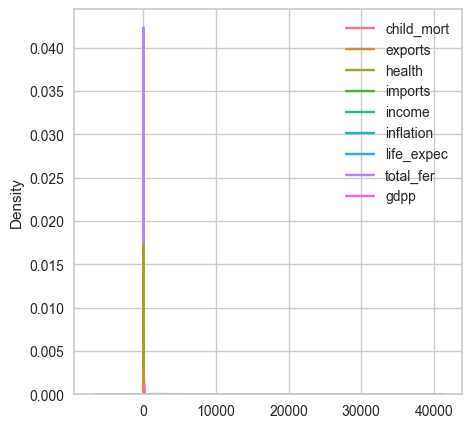

In [180]:
## Vizualizing the data

#kde Plot of unscaled Data
sns.kdeplot(data=X)

<AxesSubplot: ylabel='Density'>

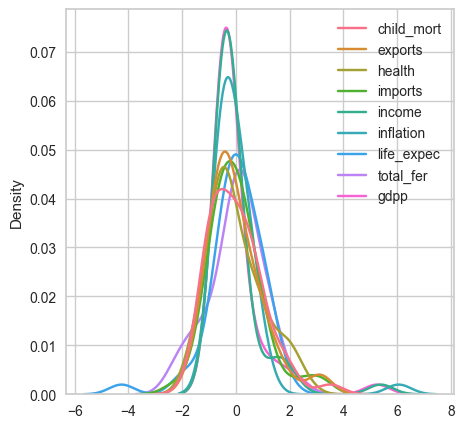

In [181]:
#kde Plot of Scaled Data
sns.kdeplot(data=X_scale)

[Text(0.5, 47.5815972222222, ''), Text(58.081597222222214, 0.5, '')]

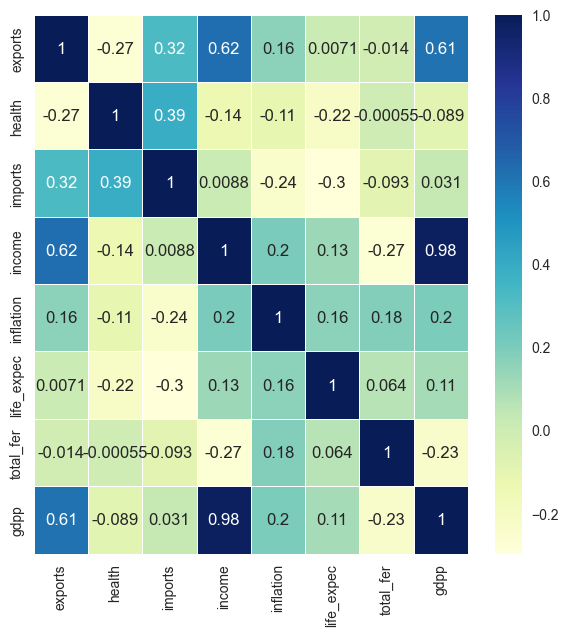

In [182]:
#Correlation heatmap for the data
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.heatmap(data = X.corr(),annot = True,cmap ='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")

In [ ]:
From heatmap, we can infer that life expectency is strictly inversly proportional to total fertility and child mortality while directly proportional to income. Thus child mortality and total fertility are directly proportional to each other. Exports are directly proportional to income and imports. income is directly proportional to life expectancy, exports while inversly proportional to child mortality. As we can see that income and gdpp are highly positivly correlated, we can infer that countries with higher income, exports and imports usually have higher gdpp which tends to better life expectancy.

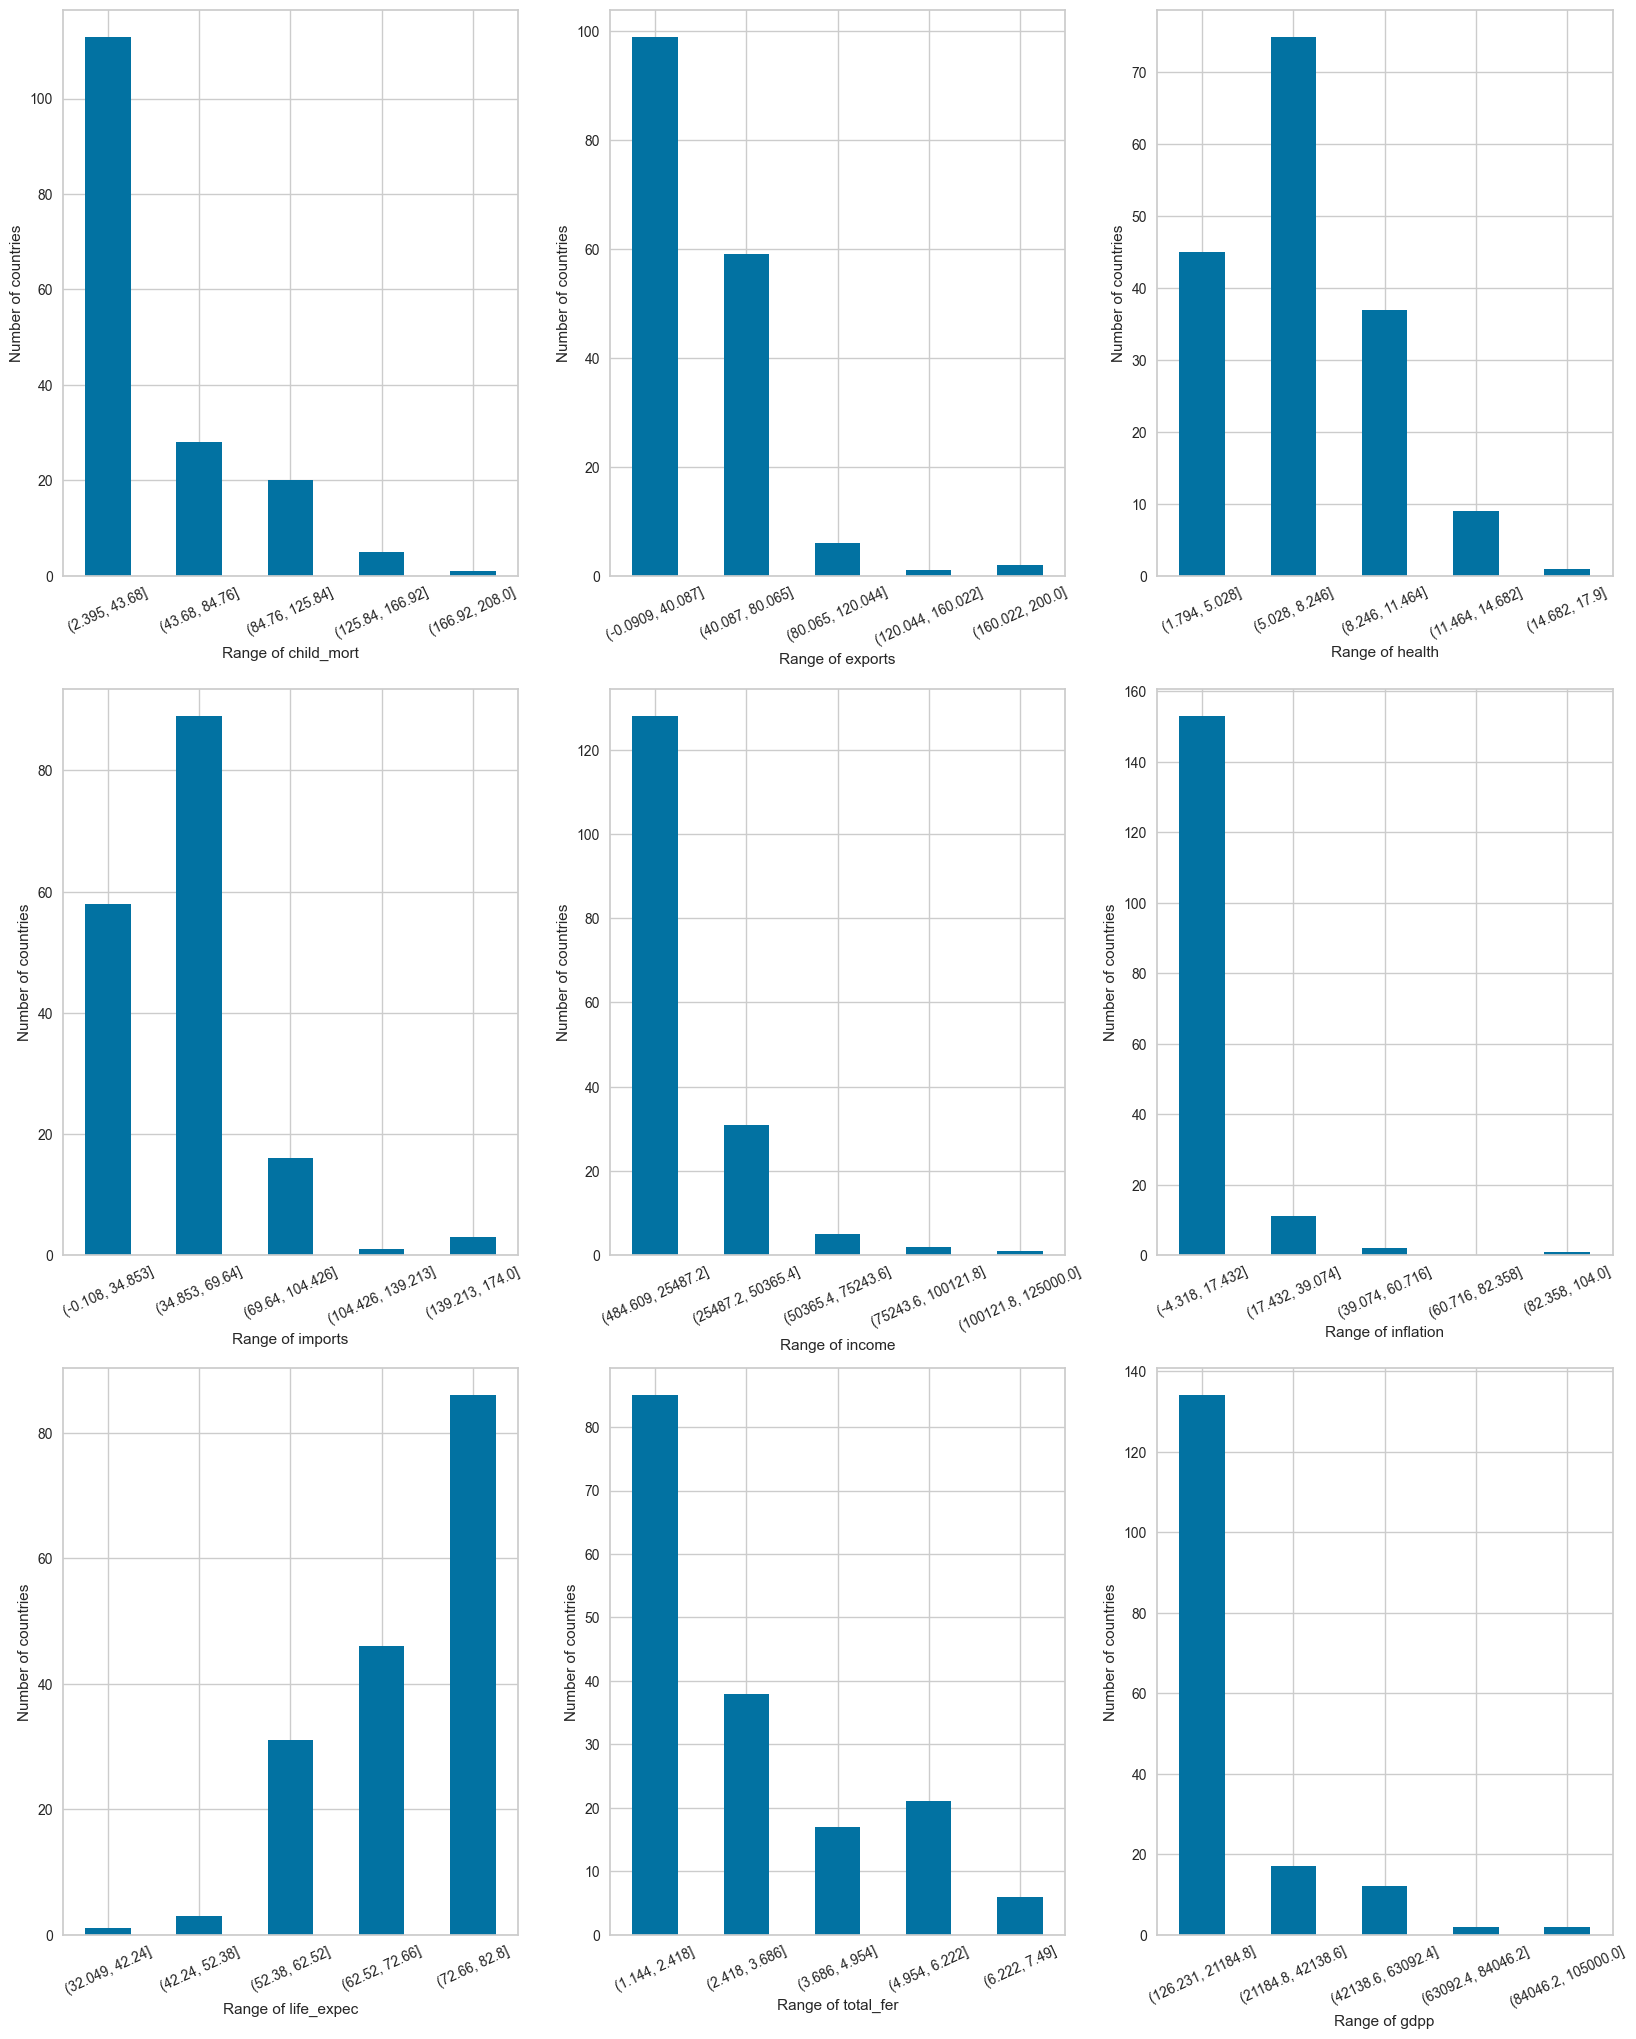

In [183]:
#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = country_df[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

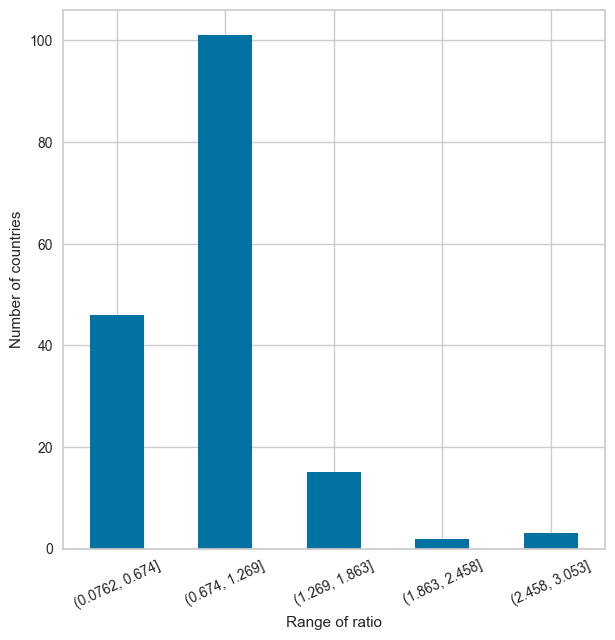

In [184]:
#Calculating export import ratio for countries
new_Da = country_df.copy()
new_Da["ratio"] = country_df["exports"]/country_df["imports"]
temp = pd.cut(x = new_Da["ratio"],bins = 5)
bin_counts = temp.value_counts().sort_index()
plt.xlabel("Range of ratio")
plt.ylabel("Number of countries")
bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

In [ ]:
From the above plot we can infer that around 50% of the countries have equal amount of exports and imports showing their developing nature. Countries with less exports but higher imports shows their underdeveloped nature as depicted by the range of ratio (0.0762,0.674]. There are some countries showing their developed nature with higher export import ratio (>1).

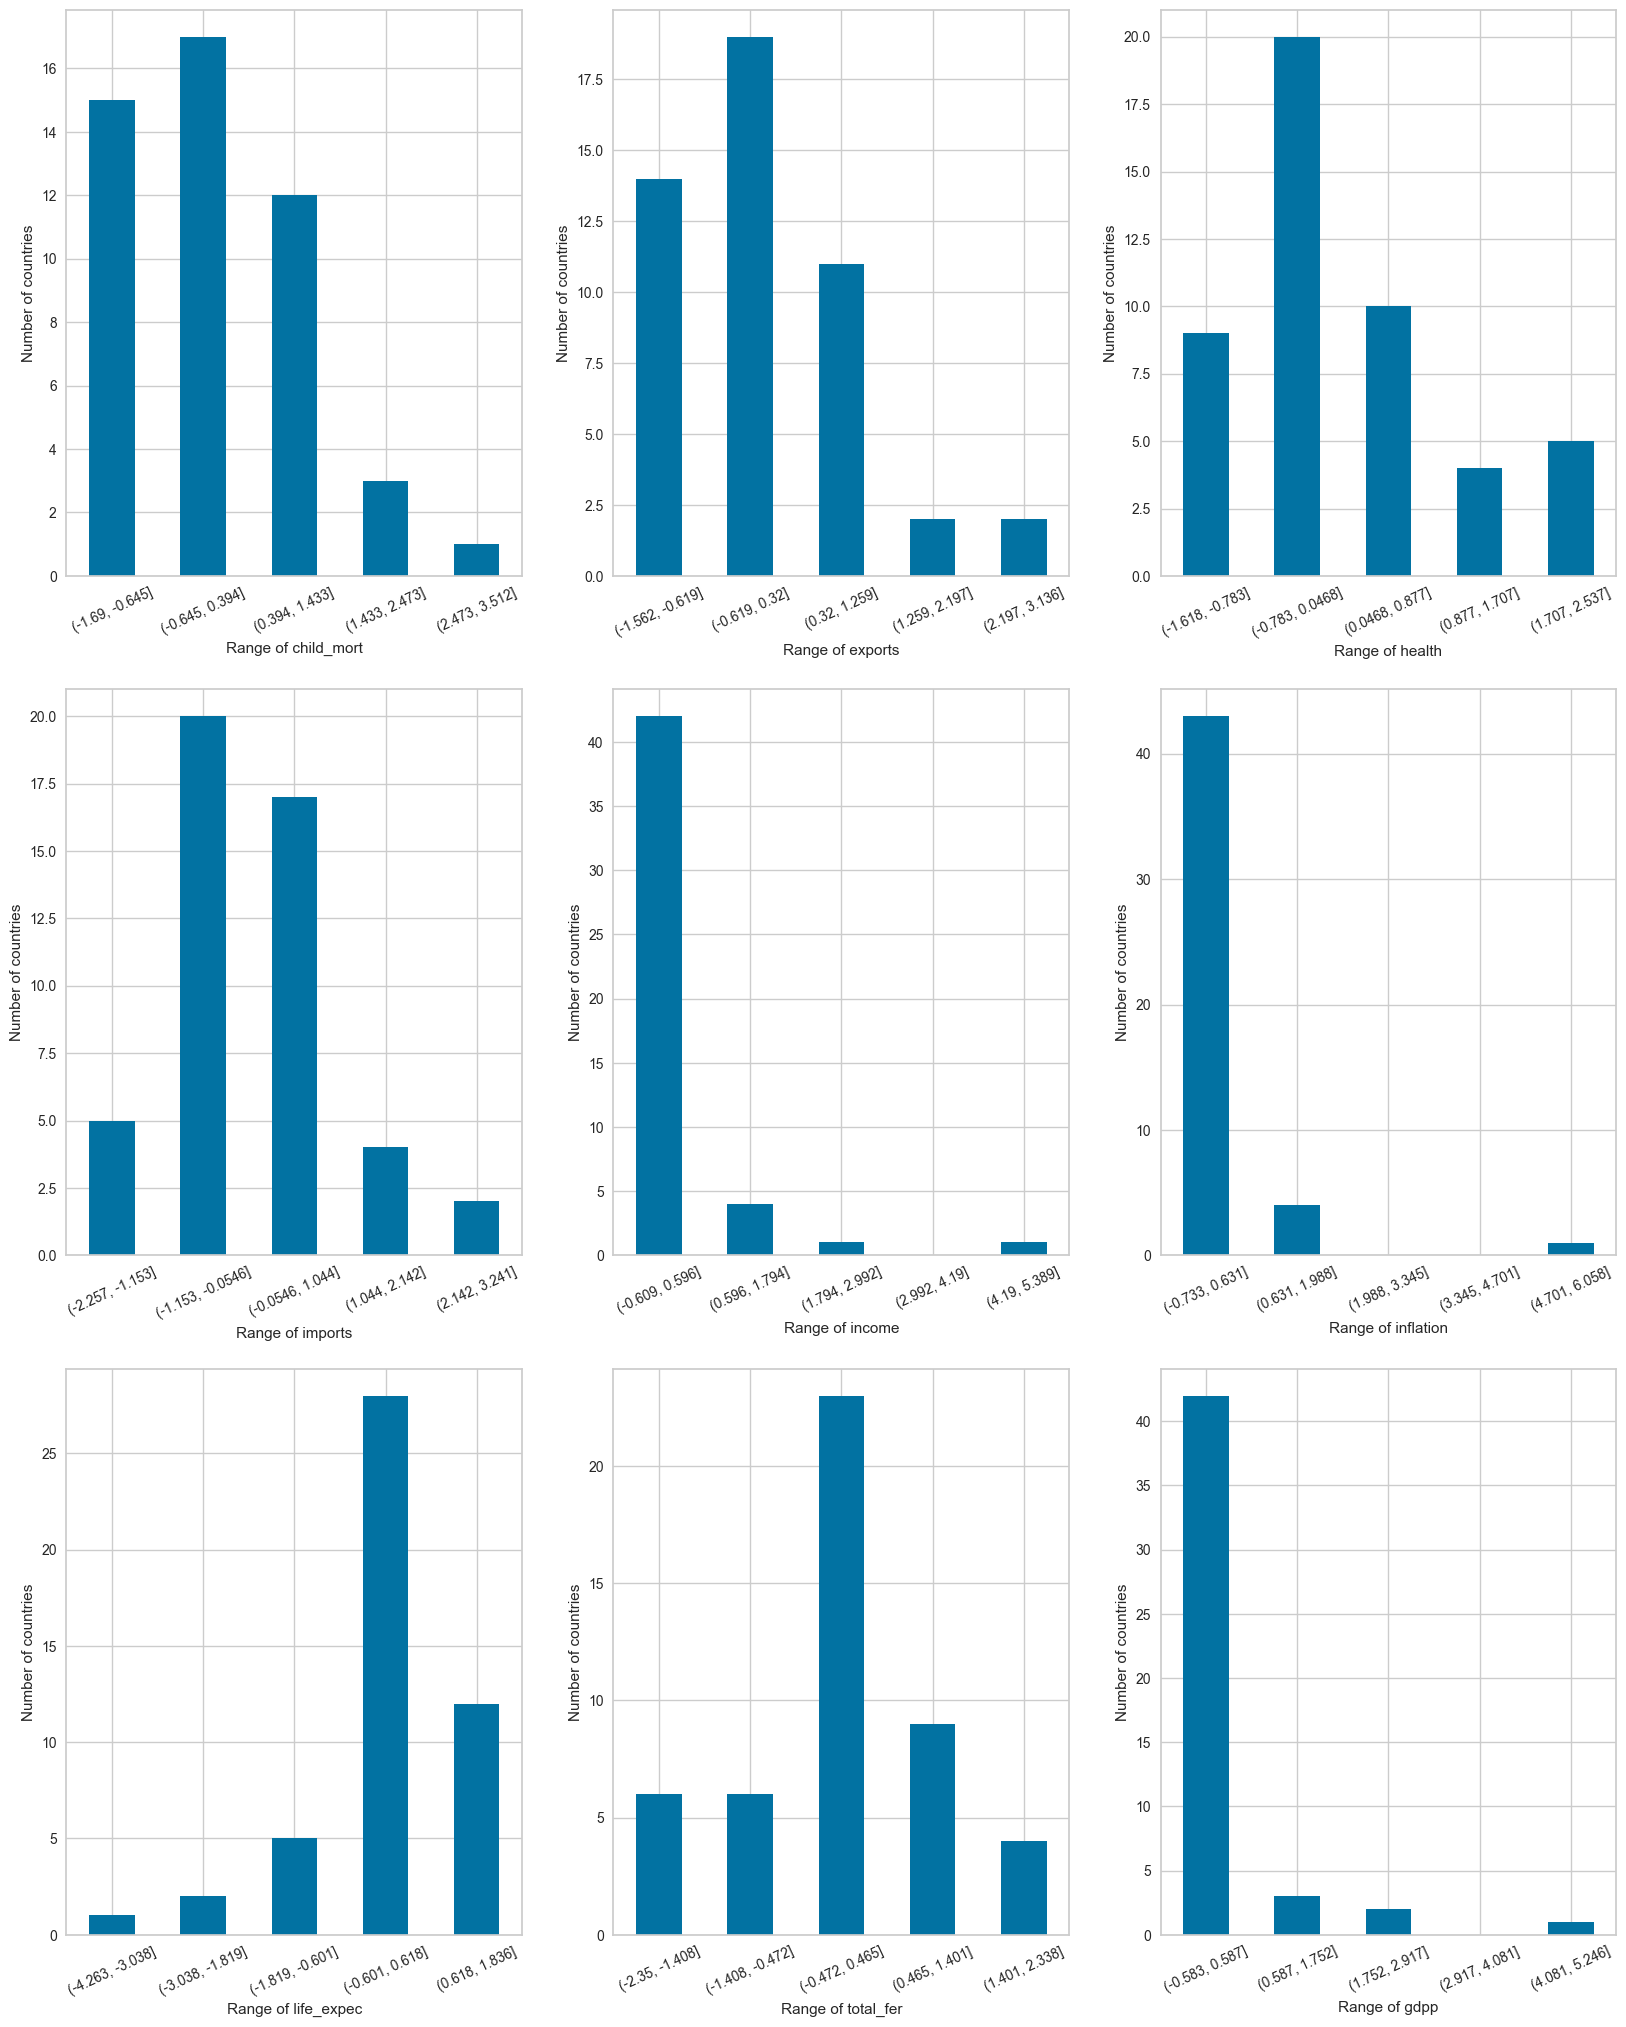

In [185]:
## Vizualize the scaled data

#Dividing the unscaled data into 5 different bins and counting countries that lie in that slot
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

In [186]:
## Selecting essential features using PCA

#Using pca to select essential features which we will use later to fit the models.
pca = PCA()
pca.fit(X_scale)

PCA()

In [187]:
#Calculating explained variance ratio of different features in dataset
expalined_variance_ratio=pca.explained_variance_ratio_

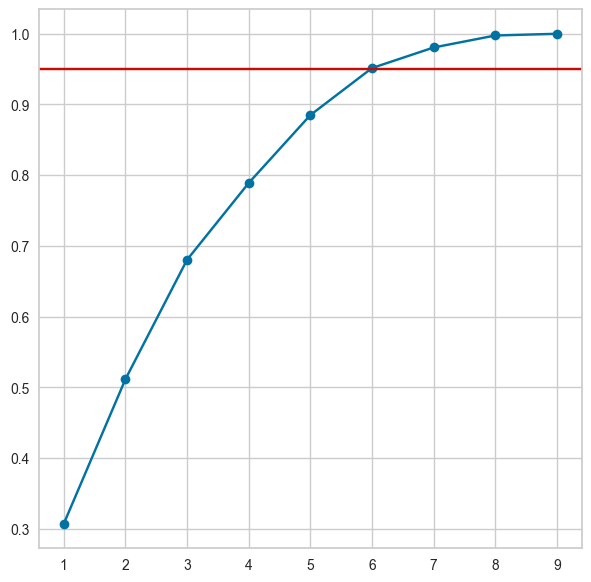

In [188]:
#Plotting the explained variance ratio to get n_components
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

In [ ]:
From the plot, we can infer that for around 95% of variance, we should take n_components=5

In [190]:
## Transforming Data

#Transforming the dataset to n_components = 5 using pca
pca=PCA(n_components=6)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,7)])
X_transform

PC1       PC2       PC3       PC4       PC5       PC6
0  -1.279734  0.091067 -0.029555 -0.460303  0.164521 -0.438800
1   1.280386  0.328218  2.085407  0.119755 -1.267153  0.235455
2  -0.655704 -0.460705  0.335178  0.692788 -0.754513 -0.386374
3   2.577635  1.070546 -1.804387  0.134864  0.921136  0.115469
4  -1.185756 -0.164896  0.671843  0.075010  0.059675 -0.765190
5  -1.736351  0.182598 -0.124388 -1.642536  0.712468 -0.915983
6  -0.625179 -0.265946  0.298788  0.910080  0.028925 -0.634066
7  -1.750042  0.674104  1.242324  1.952502  0.581767 -0.617520
8  -0.927211  0.764875  1.853346  0.369984 -1.032025 -0.591550
9  -0.477372 -0.708609 -0.631146  0.181662 -0.807133  0.246772
10 -0.846700  0.710452  1.269313 -1.137907 -0.602824  0.108424
11  2.223452  0.335833  0.660358  0.204654 -2.030116  1.485038
12 -0.013908  0.730536  0.612505  0.514032 -0.894006  0.055737
13  7.429112  2.537607  1.710245 -0.384487  0.167860 -1.700912
14 -0.464023 -2.054539 -0.434522  0.971600  0.137349  0.214484
15  3.877474 -0.613485  0.232947  0.811882  0.344799 -0.582979
16 -0.505962 -0.857728 -0.220186 -0.387731 -0.968872 -0.315411
17  0.270184 -0.491524 -0.463888  0.083717 -0.161170  0.828605
18 -0.570618  0.037895  0.743473  0.214853 -0.347451  0.402997
19 -1.368259  0.405957 -0.153645  0.118110  0.583859 -0.637926
20 -2.285723  4.335951  0.929315  2.539427  1.836713  0.671034
21  2.267271 -0.842196 -1.074327 -1.133681  0.356335 -0.431637
22 -0.098613 -1.123625 -0.971189  0.618295 -0.306360  0.009020
23 -0.671862  1.159112 -2.625195 -1.313492  0.125354  0.471792
24  0.651702 -0.328350 -1.104828  0.787085 -0.332989  1.169917
25 -0.601294  3.820566 -1.883661 -0.447733  0.068167  1.445507
26 -1.245295  1.794528 -1.680282 -2.049463 -0.542284  0.497745
27 -0.178277 -0.851865 -0.576258  0.553005 -0.626554  0.613091
28 -0.959528  0.114412  0.244463  0.232030  0.296399 -0.043552
29 -1.164340 -0.039758  1.406876  0.229793 -0.687948 -0.955714
30  0.750969 -0.139267  0.301511 -0.520405 -1.507017  1.144695
31 -0.809038  0.452360  0.468768  0.376489 -0.603433  0.085808
32  0.223184 -2.998421 -1.269559  2.277782  1.205685  0.322860
33  1.896650  0.997751 -1.538362  0.131753 -0.295817  0.313564
34 -1.473463  0.222055  1.384625 -0.406576 -1.404926 -1.043991
35  0.823427 -1.564839  4.350708 -1.884438  2.806127  2.668958
36  0.139857 -1.845205 -0.101230  1.480715  0.284788  0.255172
37 -0.845707 -0.898523 -1.634425 -0.849944  0.640885 -0.593247
38 -0.202053 -0.847052 -0.746049 -0.019364 -0.718905 -0.200239
39 -1.886026  1.352583  0.602867 -1.084743  1.739386 -0.626645
40  2.158143  0.521439 -1.866438  0.697892  2.071260 -0.591124
41  0.071374 -1.761135  0.010471 -0.266209  0.550204 -0.129446
42 -0.597113 -0.882748 -0.111521  0.032069  0.009129 -0.354510
43 -0.197626 -2.027328 -0.067858 -2.183206  0.683608 -0.780378
44 -0.466539  0.821318 -0.675801 -0.238084 -0.849844  0.234066
45 -1.155983 -0.324347  0.115598 -0.806745  0.398646 -0.877671
46  0.730441 -1.576282 -0.295189 -0.470728 -0.148710  0.690751
47 -0.125962  0.206609  0.552961  0.375949  0.115009 -0.072100

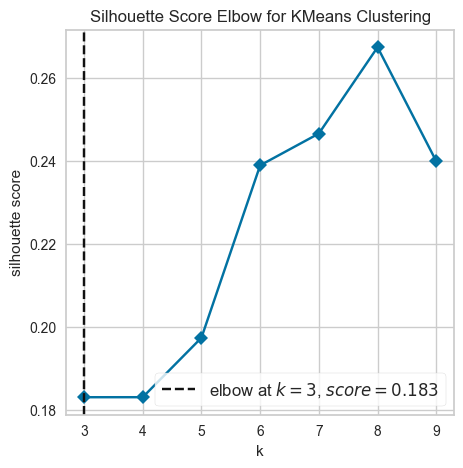

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [194]:
## K_means clustering

#Using elbow method to calculate optimal number of clusters
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

#elbow method by using Silhouette score
visualizer = KElbowVisualizer(kmeans_clf, k=(3,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

In [ ]:
From the plots, we can infer that optimal number of cluster for KMeans is four

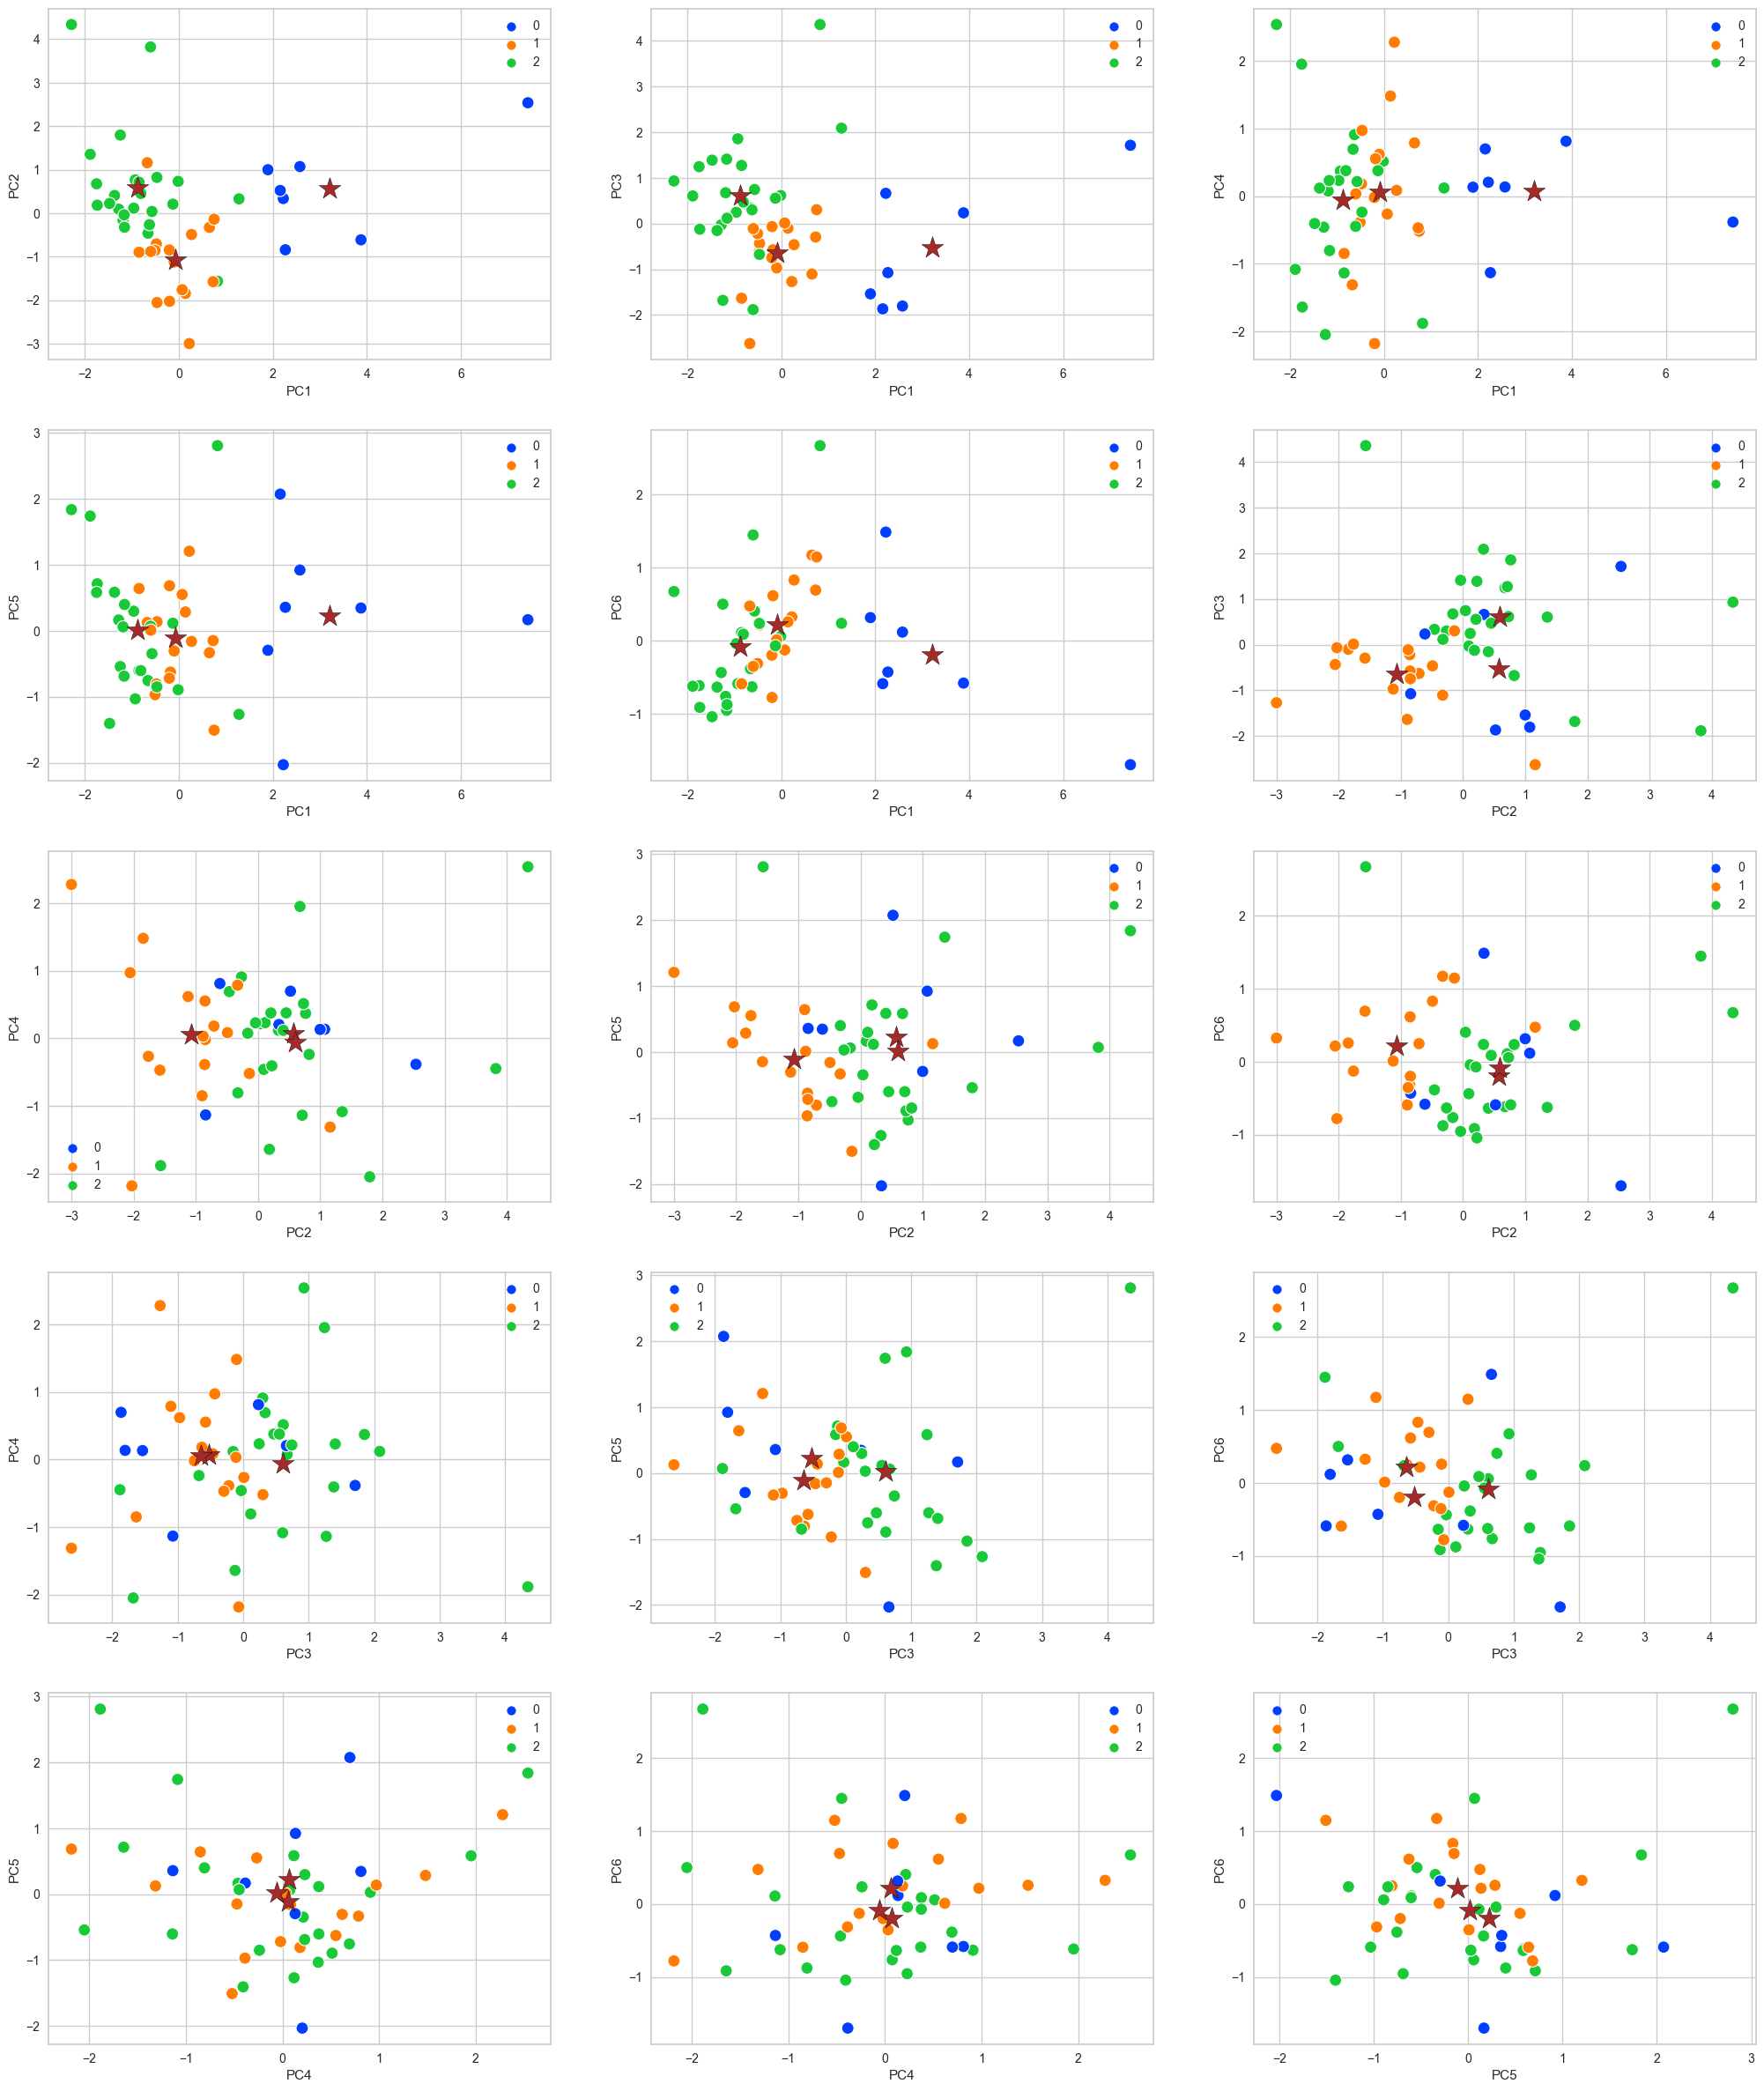

In [197]:
#Assigning cluster labels to datapoints using KMeans
models_kmeans = KMeans(n_clusters = 3)
clusters = models_kmeans.fit_predict(X_transform)

#Plotting the clusters with the datapoints and centroids
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns

#Centroids
centroids_kmeans = models_kmeans.cluster_centers_

for j in range(len(cols)):
  for k in range(j,len(cols)):
    #We do not want to plot for same feature vs same feature
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      #Plotting cluster
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100,alpha = 1)
      #PLotting centroids
      ax.scatter(centroids_kmeans[:,j],centroids_kmeans[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [ ]:
From the plots, we can infer that PC1 and PC2 are seperating the clusters very effectively while other features are not performing well

In [198]:
#Storing the cluster labels we got from KMeans into a numpy array
country_labels_kmeans = models_kmeans.labels_
country_labels_kmeans

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 1, 2])

In [199]:
#Calculating percentage of points in each clusters
unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 7	14.58%
Class 1: 17	35.42%
Class 2: 24	50.00%



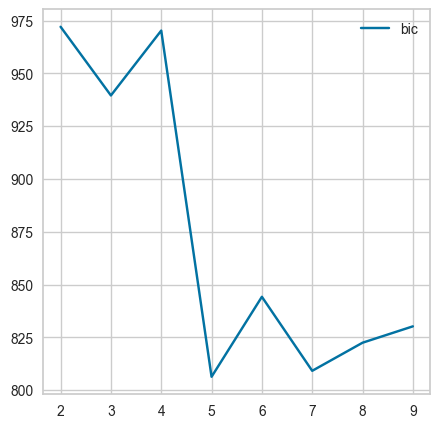

5

In [205]:
## Gaussian Clustering

#Calculating optimal value for n_components for Gaussian mixture by minimizing the BIC(Bayessian information criterion)
bic = []
for n in range(2,10):
    temp = GaussianMixture(n_components=n)
    temp.fit(X_transform)
    bic.append(temp.bic(X_transform))
plt.plot(range(2,10),bic,label = 'bic')
plt.legend()
plt.show()
k = (bic.index(min(bic)) + 2)
k

In [ ]:
So optimal value of n_components for Gaussian mixture is 4 same as KMeans model

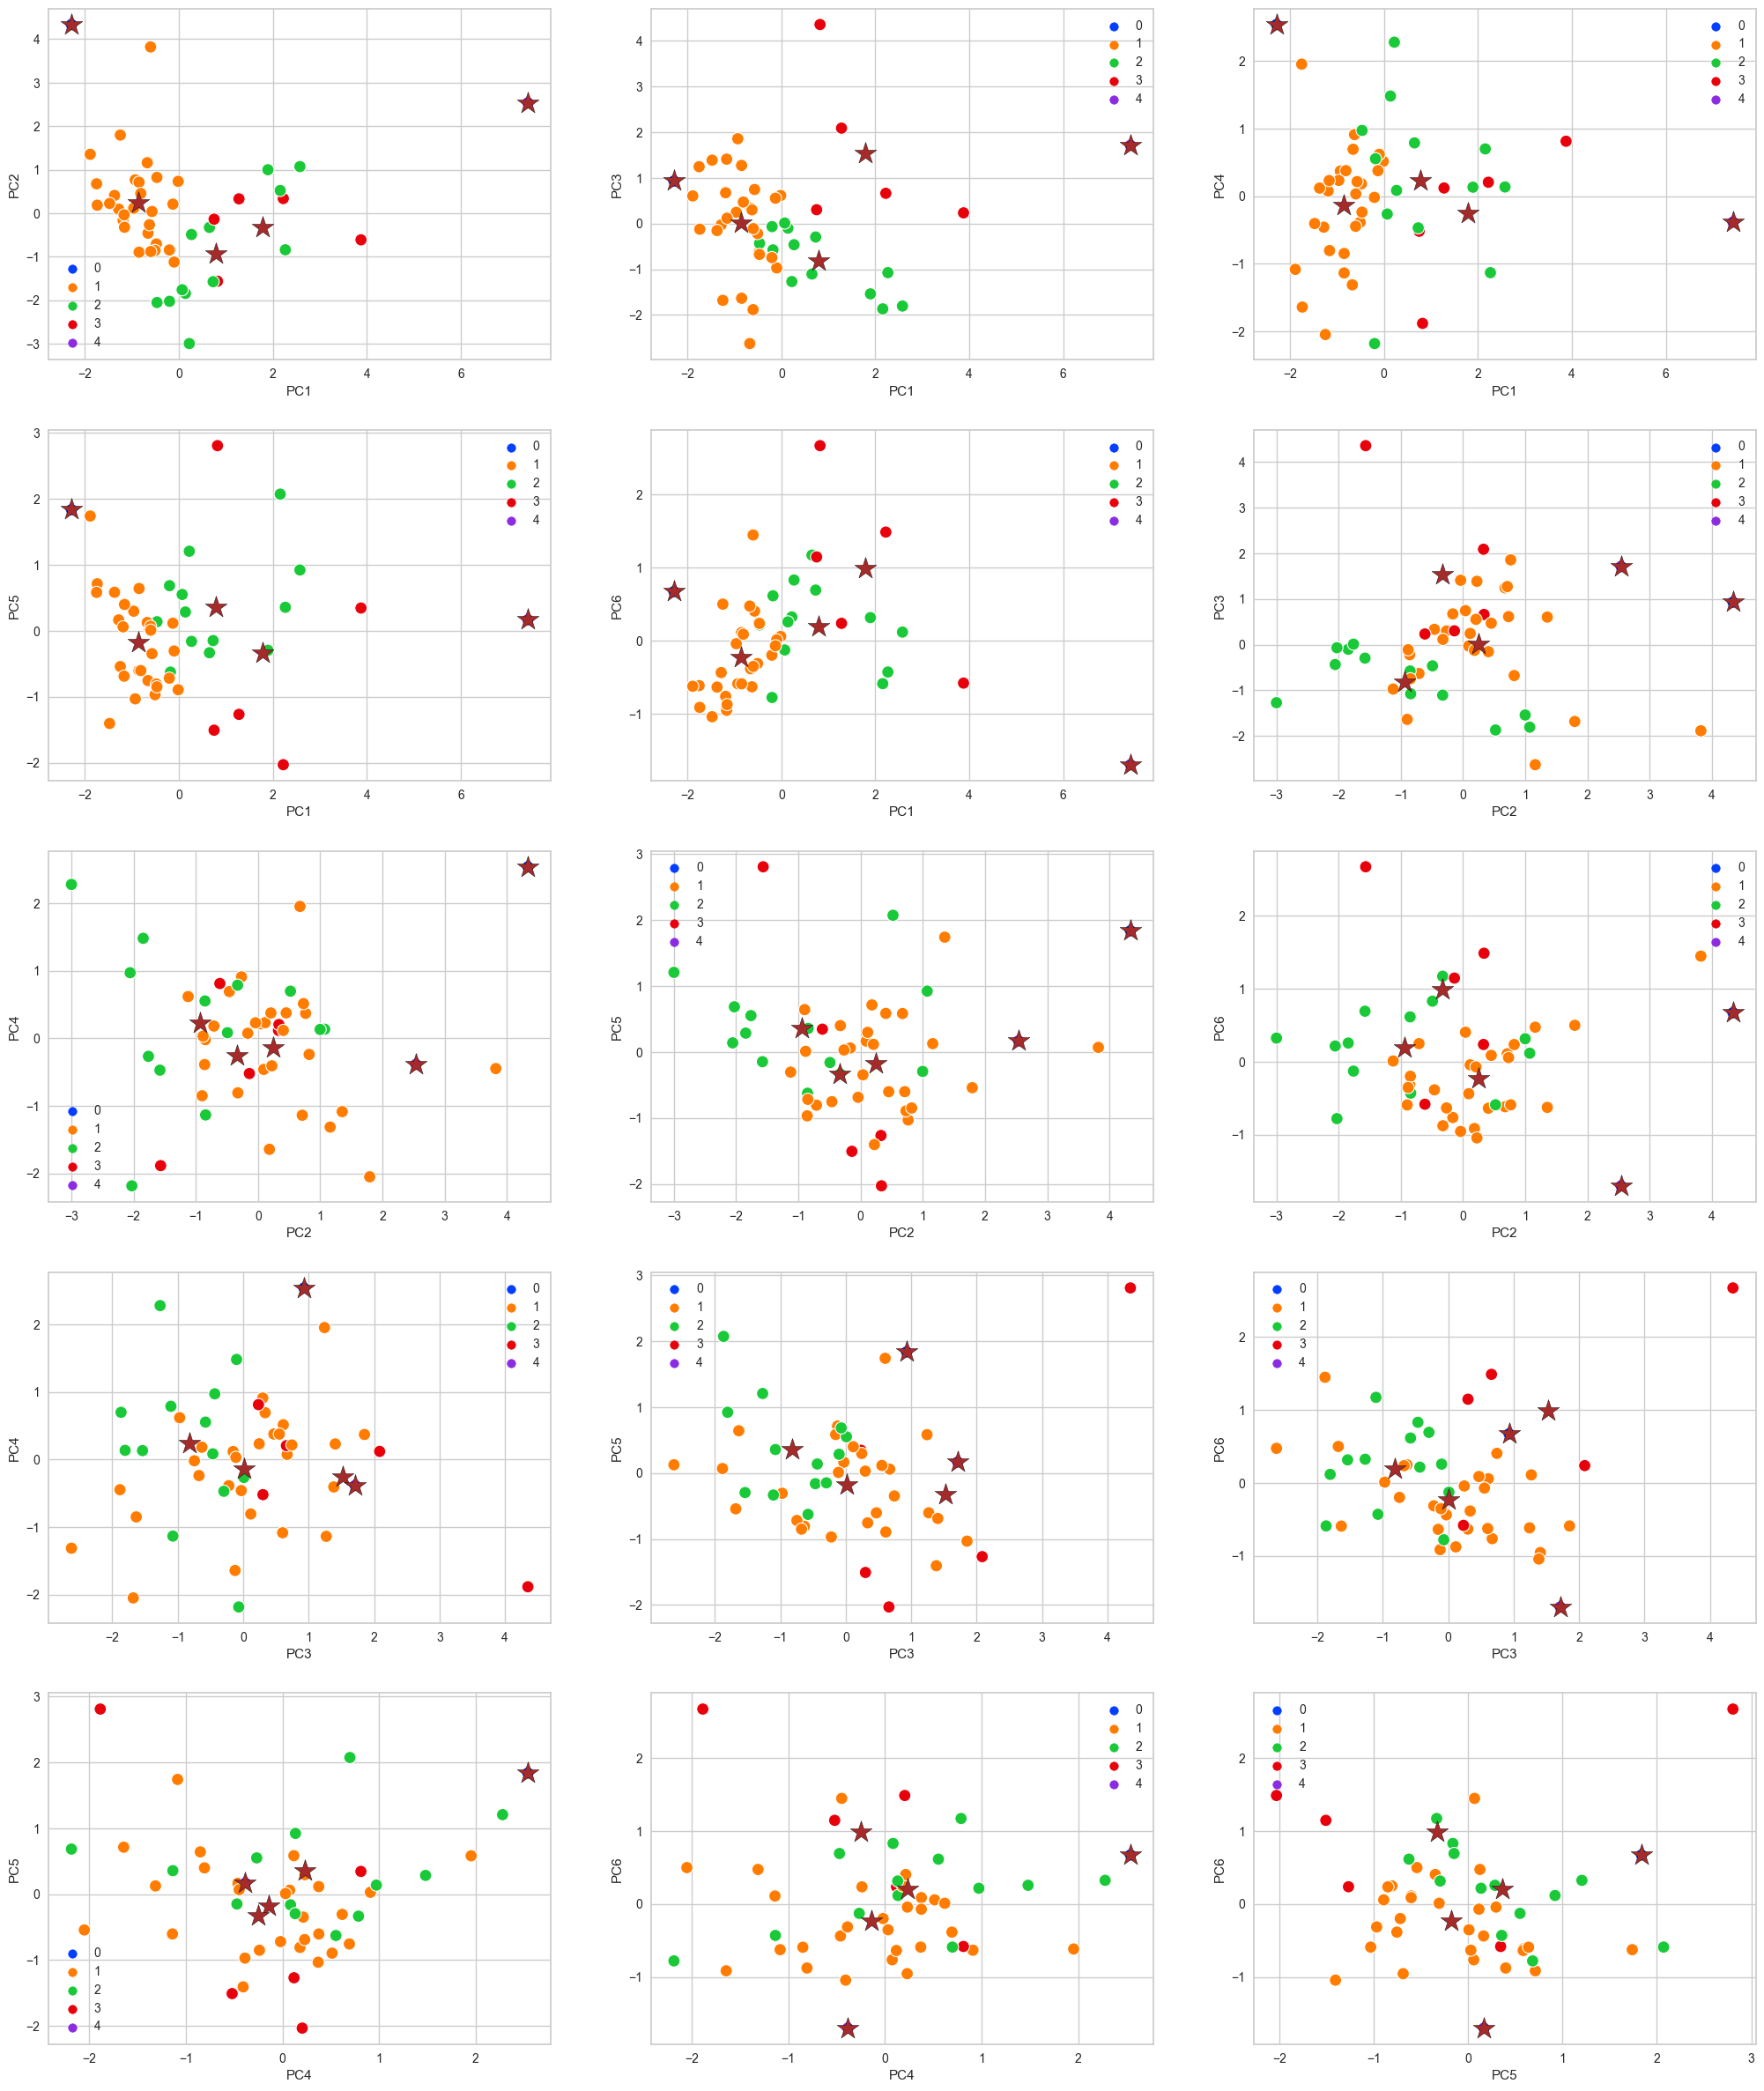

In [206]:
#Performing Gaussian mixture modelling on data with n_components = 4
gmm = GaussianMixture(n_components=k)
gmm.fit(X_transform)

country_labels_gaussian = gmm.predict(X_transform)
#Centroids
centroids_guassian = gmm.means_

#Plotting the clusters and centroids as done in KMeans part
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_gaussian,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_guassian[:,j],centroids_guassian[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [207]:
#Calculating percentage of datapoints in each cluster
unique_labels, counts = np.unique(country_labels_gaussian, return_counts=True)
percentages = counts / len(country_labels_gaussian) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 1	2.08%
Class 1: 28	58.33%
Class 2: 13	27.08%
Class 3: 5	10.42%
Class 4: 1	2.08%



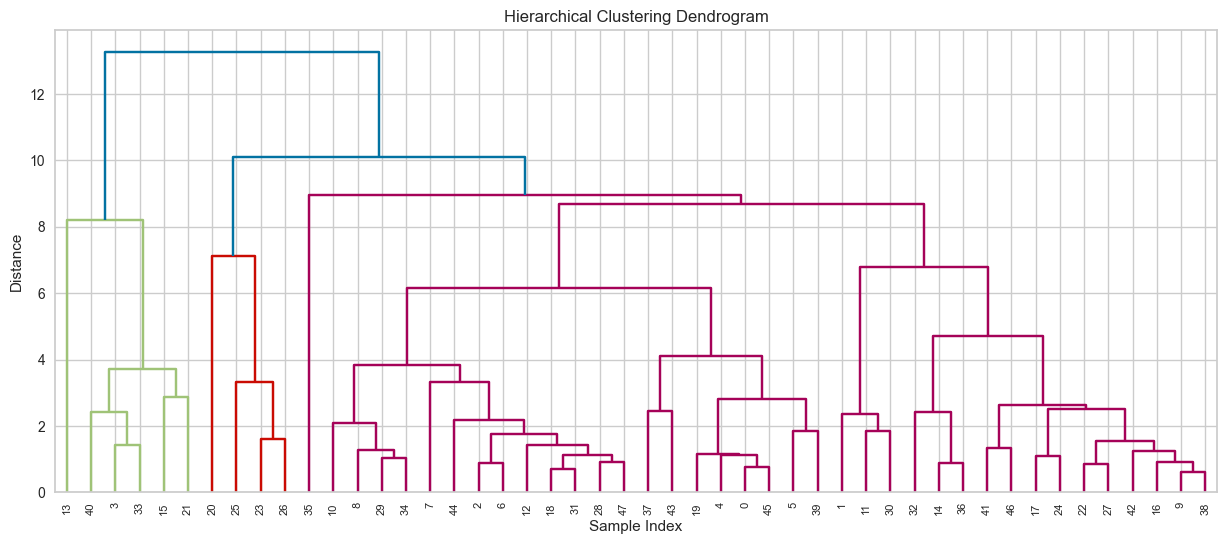

In [208]:
## Hierarchial Clustering

#Calculating optimal value of n_clusters for Agglomerative Clustering


Z = linkage(X_transform, method='ward', metric='euclidean')
#Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [ ]:
Optimal value of n_cluster for Agglomerative Clustering is 3

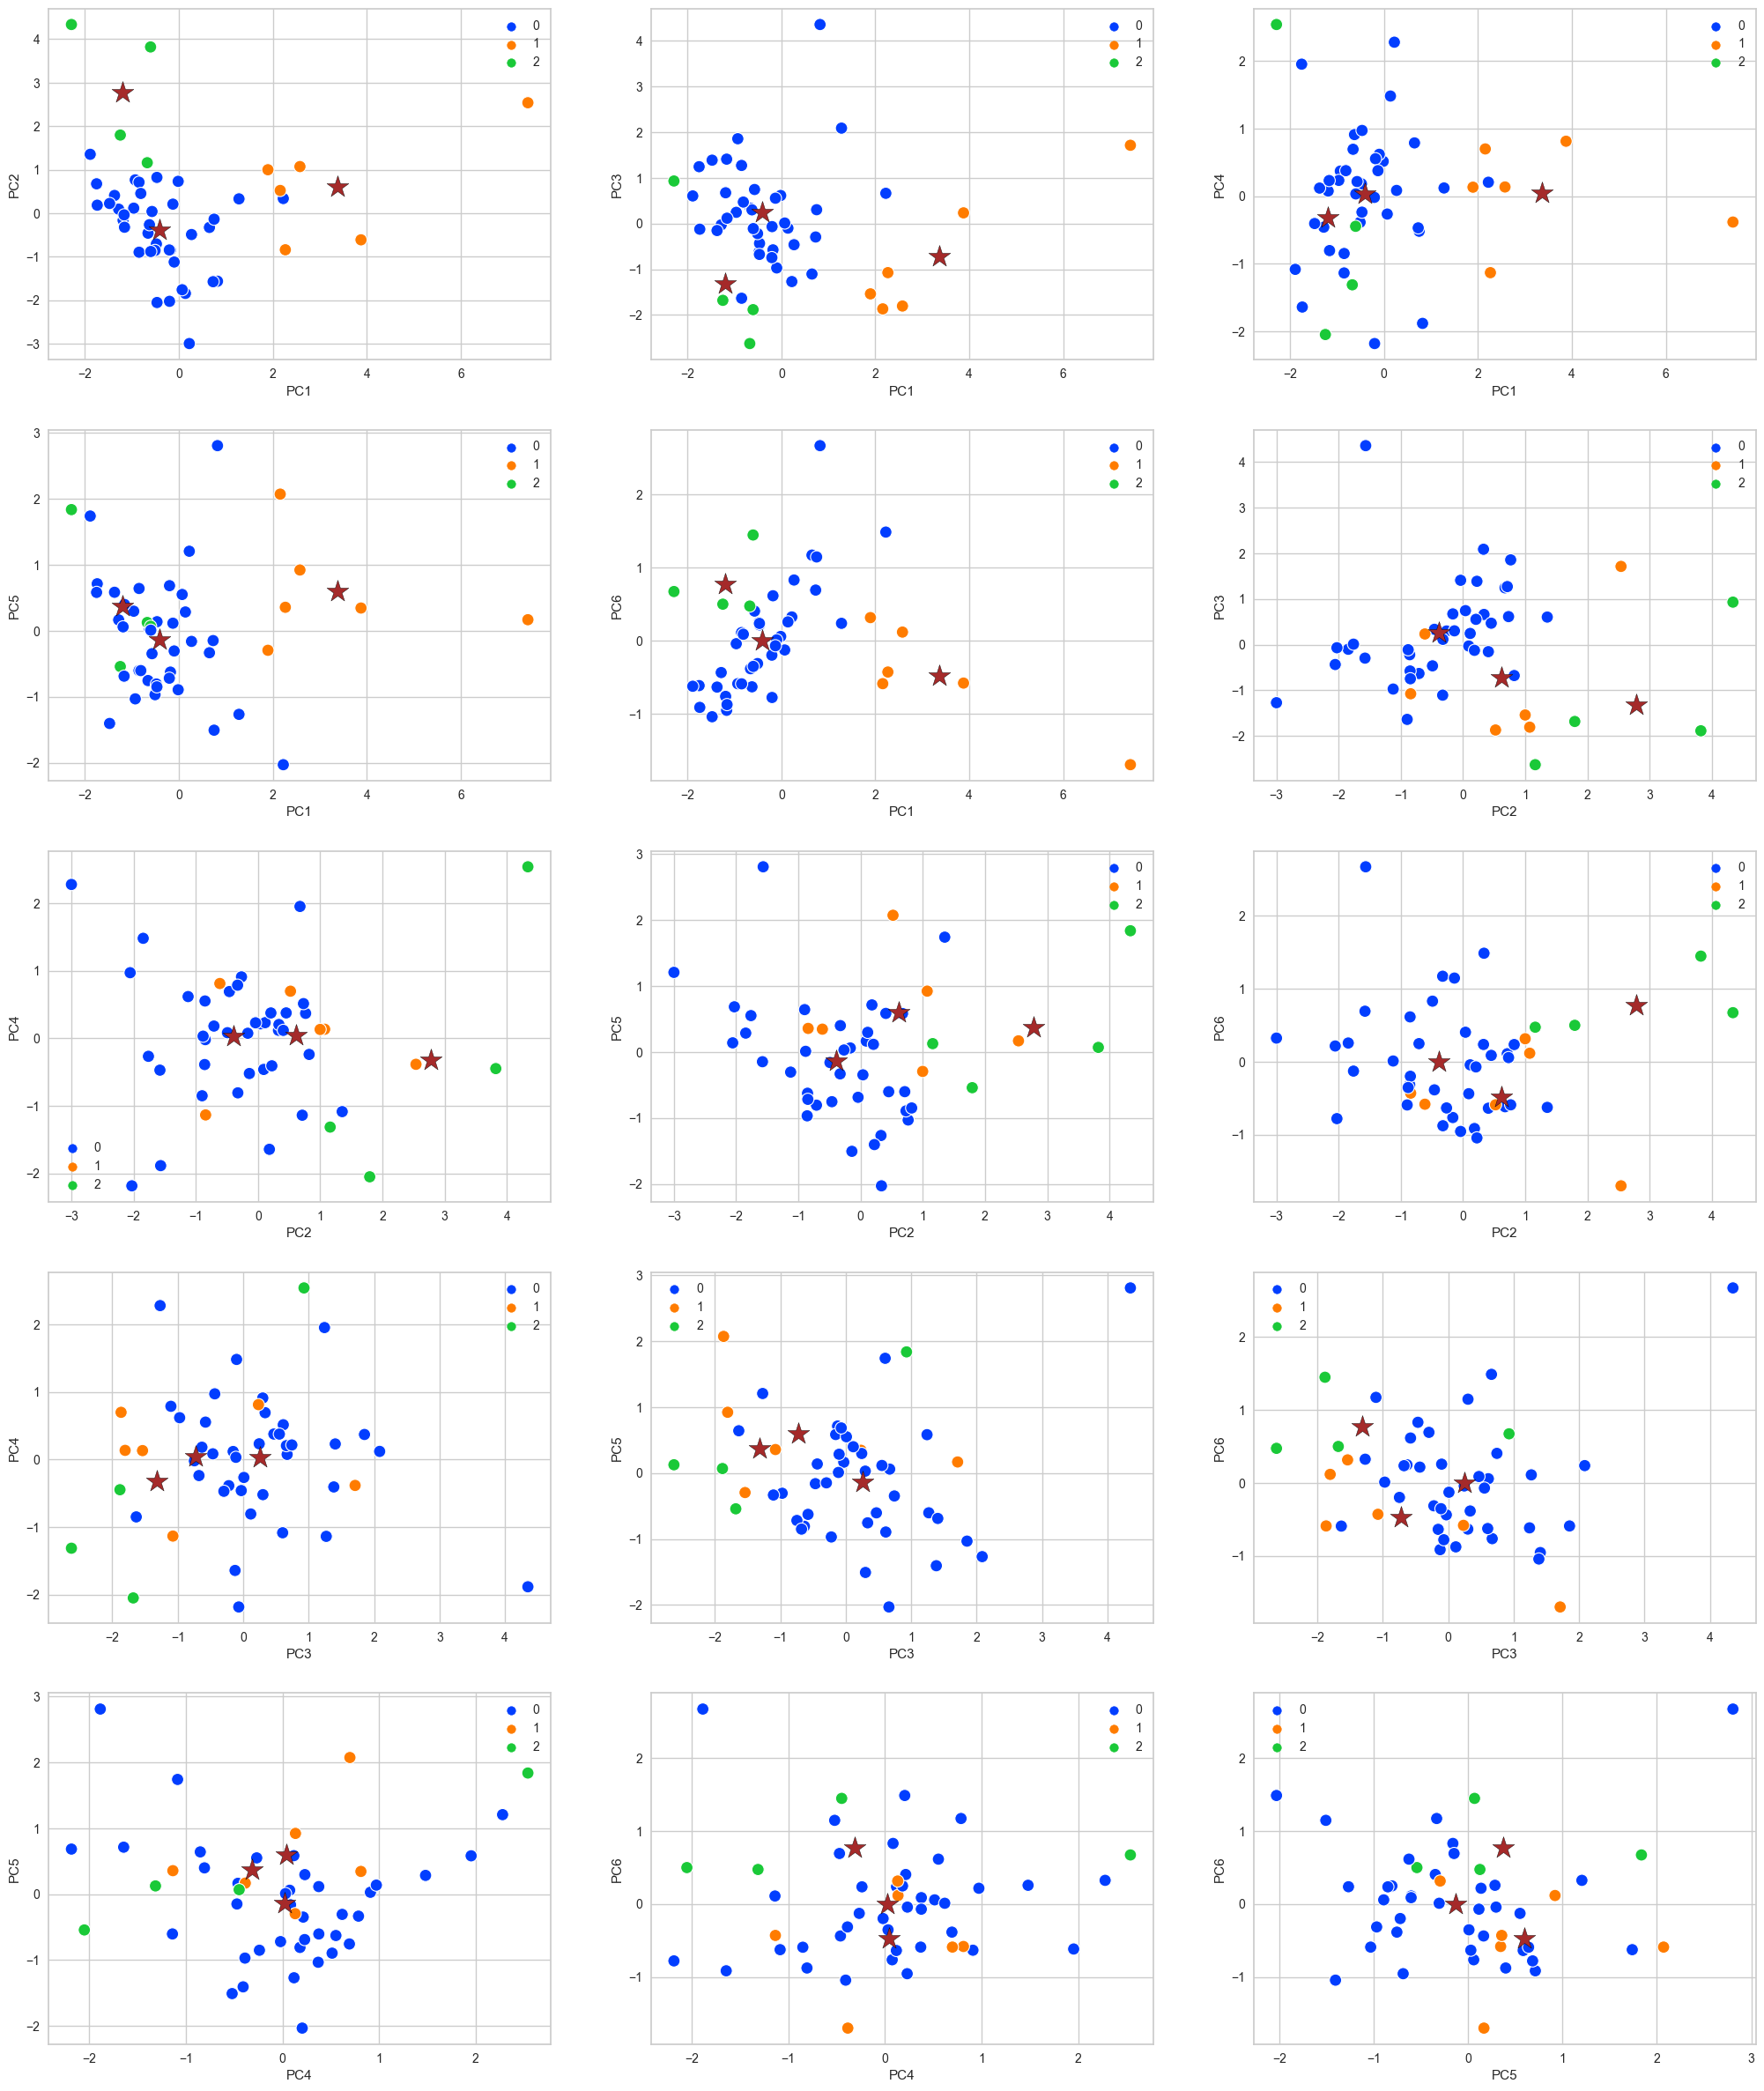

In [209]:
#Fitting Agglomerative Clustering model on data with n_clusters = 3
model_hir_agg = AgglomerativeClustering(n_clusters=3)
model_hir_agg.fit(X_transform)
country_labels_hir_agg = model_hir_agg.labels_

#Plotting the clusters
X_transform['country_labels_hir_agg']=country_labels_hir_agg
centroids_hir_agg=X_transform.groupby('country_labels_hir_agg').mean().values
X_transform.drop('country_labels_hir_agg',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_hir_agg,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_hir_agg[:,j],centroids_hir_agg[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [210]:
#Calculating percentage of datapoints in each cluster

unique_labels, counts = np.unique(country_labels_hir_agg, return_counts=True)
percentages = counts / len(country_labels_hir_agg) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 38	79.17%
Class 1: 6	12.50%
Class 2: 4	8.33%



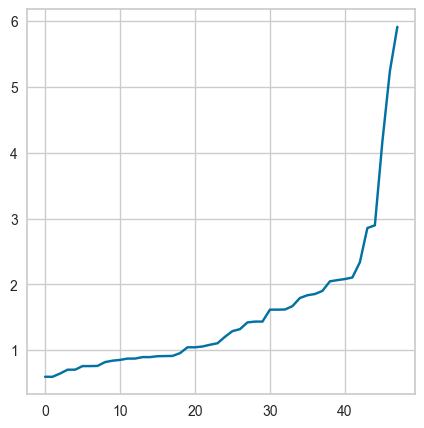

In [211]:
## DBSCAN Clustering

from sklearn.neighbors import NearestNeighbors

#Calculating optimal value for eps for DBSCAN algorithm on the given dataset
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transform)
distances, indices = nbrs.kneighbors(X_transform)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 5,5
plt.plot(distances)

In [ ]:
By observing the plot, we can infer that we are getting elbow at around eps = 2

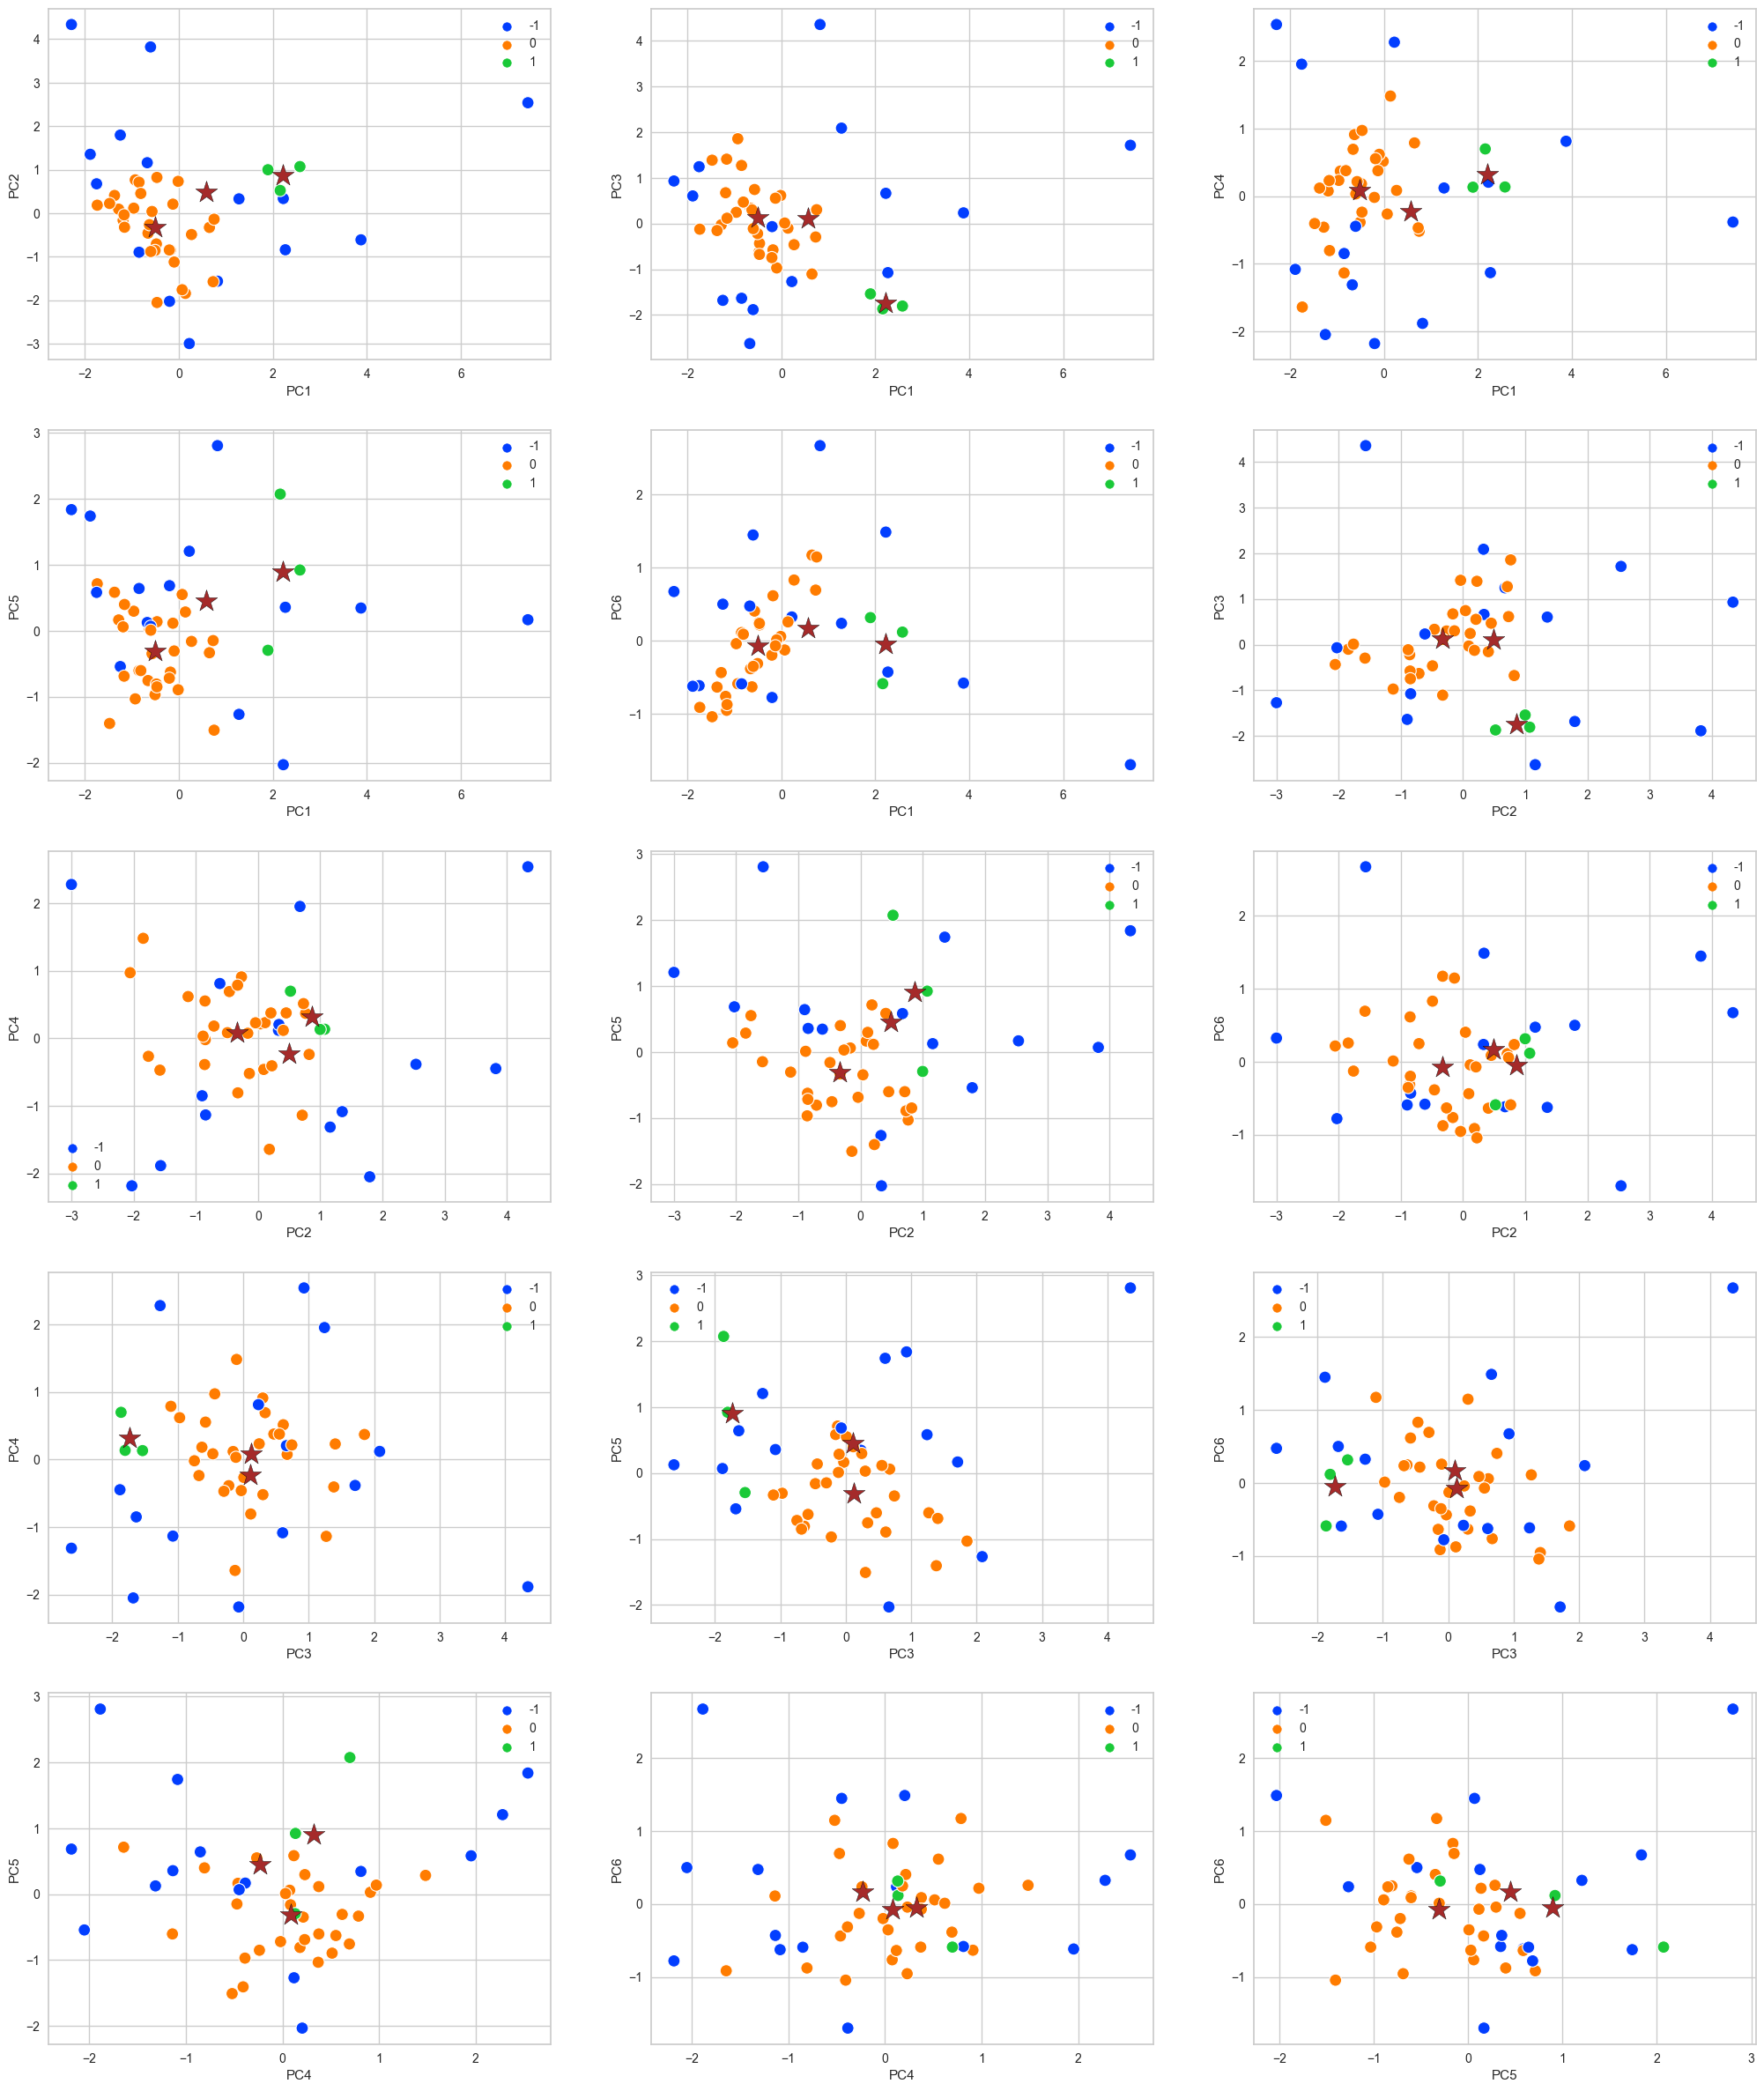

In [215]:
#Fitting a DBSCAN model on the dataset with eps = 1.5 and min_samples = 3
#Here we took min_samples = 3 by the observations from previous clusters where we are getting a cluster with only 3 samples
db = DBSCAN(eps = 1.8, min_samples = 3 )# minimum samples is set to 8
db.fit(X_transform)

#Storing the cluster labels that we got from DBSCAN
country_labels_dbscan = db.labels_

#PLotting the clusters
X_transform['country_labels_dbscan']=country_labels_dbscan
centroids_dbscan=X_transform.groupby('country_labels_dbscan').mean().values
X_transform.drop('country_labels_dbscan',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 3, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_dbscan,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_dbscan[:,j],centroids_dbscan[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [217]:
## Evaluating the Clustering

print("Gaussian",sscore(X_transform, country_labels_gaussian, metric='euclidean'))

print("KMeans",sscore(X_transform,country_labels_kmeans,metric = 'euclidean'))

print("alggomerative",sscore(X_transform,country_labels_hir_agg,metric = 'euclidean'))

print("Dbscan",sscore(X_transform,country_labels_dbscan,metric = 'euclidean'))

Gaussian 0.18536606319775853
KMeans 0.17129393187758335
alggomerative 0.348370928482155
Dbscan 0.22302123145752092


In [218]:
country_labels_hir_agg

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [234]:
# under_developed = under_developed.reset_index().drop(["index" ,"labels"], axis = 1)
under_developed["labels"] = country_labels_hir_agg
under_developed

country child_mort  exports  health   imports  income  \
0                Afghanistan       90.2   10.000    7.58   44.9000    1610   
1                     Angola      119.0   62.300    2.85   42.9000    5900   
2                      Benin      111.0   23.800    4.10   37.2000    1820   
3                   Botswana       52.5   43.600    8.30   51.3000   13300   
4               Burkina Faso      116.0   19.200    6.74   29.6000    1430   
5                    Burundi       93.6    8.920   11.60   39.2000     764   
6                   Cameroon      108.0   22.200    5.13   27.0000    2660   
7   Central African Republic      149.0   11.800    3.98   26.5000     888   
8                       Chad      150.0   36.800    4.53   43.5000    1930   
9                    Comoros       88.2   16.500    4.51   51.7000    1410   
10          Congo, Dem. Rep.      116.0   41.100    7.91   49.6000     609   
11               Congo, Rep.       63.9   85.100    2.46   54.7000    5190   
12             Cote d'Ivoire      111.0   50.600    5.30   43.3000    2690   
13         Equatorial Guinea      111.0   85.800    4.48   58.9000   33700   
14                   Eritrea       55.2    4.790    2.66   23.3000    1420   
15                     Gabon       63.7   57.700    3.50   18.9000   15400   
16                    Gambia       80.3   23.800    5.69   42.7000    1660   
17                     Ghana       74.7   29.500    5.22   45.9000    3060   
18                    Guinea      109.0   30.300    4.93   43.2000    1190   
19             Guinea-Bissau      114.0   14.900    8.50   35.2000    1390   
20                     Haiti      208.0   15.300    6.91   64.7000    1500   
21                      Iraq       36.9   39.400    8.41   34.1000   12700   
22                     Kenya       62.2   20.700    4.75   33.6000    2480   
23                  Kiribati       62.7   13.300   11.30   79.9000    1730   
24                       Lao       78.9   35.400    4.47   49.3000    3980   
25                   Lesotho       99.7   39.400   11.10  101.0000    2380   
26                   Liberia       89.3   19.100   11.80   92.6000     700   
27                Madagascar       62.2   25.000    3.77   43.0000    1390   
28                    Malawi       90.5   22.800    6.59   34.9000    1030   
29                      Mali      137.0   22.800    4.98   35.1000    1870   
30                Mauritania       97.4   50.700    4.41   61.2000    3320   
31                Mozambique      101.0   31.500    5.21   46.2000     918   
32                   Myanmar       64.4    0.109    1.97    0.0659    3720   
33                   Namibia       56.0   47.800    6.78   60.7000    8460   
34                     Niger      123.0   22.200    5.16   49.1000     814   
35                   Nigeria      130.0   25.300    5.07   17.4000    5150   
36                  Pakistan       92.1   13.500    2.20   19.4000    4280   
37                    Rwanda       63.6   12.000   10.50   30.0000    1350   
38                   Senegal       66.8   24.900    5.66   40.3000    2180   
39              Sierra Leone      160.0   16.800   13.10   34.5000    1220   
40              South Africa       53.7   28.600    8.94   27.4000   12000   
41                     Sudan       76.7   19.700    6.32   17.2000    3370   
42                  Tanzania       71.9   18.700    6.01   29.1000    2090   
43               Timor-Leste       62.6    2.200    9.12   27.8000    1850   
44                      Togo       90.3   40.200    7.65   57.3000    1210   
45                    Uganda       81.0   17.100    9.01   28.6000    1540   
46                     Yemen       56.3   30.000    5.18   34.4000    4480   
47                    Zambia       83.1   37.000    5.89   30.9000    3280   

    inflation  life_expec  total_fer   gdpp  labels  
0       9.440        56.2       5.82    553       0  
1      22.400        60.1       6.16   3530       0  
2       0.885        61.8       5.36

In [244]:
under_developed["child_mort"] = under_developed["child_mort"].astype(float)
group_df = under_developed.drop("country",axis = 1).groupby("labels").mean()
group_df["ratio"] = (group_df["exports"]/group_df["imports"])
group_df

child_mort    exports     health    imports        income  inflation  \
labels                                                                         
0        94.739474  25.795237   5.808158  36.835945   2293.236842  12.590658   
1        62.300000  50.483333   6.735000  41.883333  15926.666667  12.821667   
2       114.925000  21.775000  10.277500  84.550000   1577.500000   4.147500   

        life_expec  total_fer         gdpp     ratio  
labels                                                
0        60.197368   5.246842  1013.710526  0.700274  
1        60.166667   3.820000  8195.000000  1.205332  
2        50.025000   3.872500   912.250000  0.257540

In [266]:
value_counts=under_developed["labels"].value_counts()
value_counts


0    38
1     6
2     4
Name: labels, dtype: int64

On the basis of mean data we got in previous part, we can say that countries lying in 

In [278]:
cnt_0_2= value_counts[0]+value_counts[2]
cnt_1=value_counts[1]
b=cnt_0_2*3+cnt_1
c=-10000000
x= np.roots([b, c])[0]
x=round(x,0)
print(3*x,'$ can be given to the low level under developed countries individually')
print(x, ' $  can be given to the high level under developed countries individually')

227274.0 $ can be given to the low level under developed countries individually
75758.0  $  can be given to the high level under developed countries individually
